# **eda-SERS: Exploratory Data Analysis (EDA) of Surface-Enhanced Raman Spectroscopy (SERS)**

## **Code Setup**

Imports (packages/modules)

In [1]:
# General imports
# -----------------------------

import os
import sys
import random
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from  matplotlib.ticker import FuncFormatter
import warnings


# Specific imports
# -----------------------------

sys.path.append('./modules/')
import utils_v1 as utils

from sklearn import preprocessing
from scipy.signal import find_peaks, peak_prominences, peak_widths




Functions/Classes

In [2]:
# def foo(par):
#     ...

#     return result

Running configurations

In [3]:
# matplotlib
%matplotlib inline

# pandas display
pd.options.display.float_format = "{:,.3f}".format

# random number generators
seed = 17

# ignore warnings
warnings.filterwarnings("ignore")

# configure plots
fs_axeslabels = 20
fs_ticklabels = 16
fs_text = 12
fs_legend_title = 20
fs_legend = 16
resol = 300

# band = '1079.03'  # substrato-11ago2021
band = '1079.12'  # substrato-03set2021


Running parameters

In [4]:
# param = [nb_name, exp_name, path_out, path_in]
# nb_name: name of this notebook
# exp_name: name of the experiment
# path_out: path to save the outputs
# path_in: path to get the inputs
# opt_1: analysis type (multi, 0v1, 0vR)

#default
param = ['eda-SERS-v1', 
         'raw-multi', 
         '../experiments/substrato-03set2021/', 
         '../data/datasets/substrato-03set2021/raw-SERS-wallance-v1_raw/raw-SERS-wallance-v1_raw.csv',
         'multi'
        ]


In [5]:
nb_name = param[0]
exp_name = param[1]
exp_id = nb_name

if exp_name:
    exp_id += '_' + exp_name

path_out = param[2] + exp_id + '/'
path_in = param[3]
opt_1 = param[4]   

print('nb_name  =', nb_name)
print('exp_name =', exp_name)
print('path_out =', path_out)
print('path_in  =', path_in)
print('opt_1 = ', opt_1)


nb_name  = eda-SERS-v1
exp_name = raw-multi
path_out = ../experiments/substrato-03set2021/eda-SERS-v1_raw-multi/
path_in  = ../data/datasets/substrato-03set2021/raw-SERS-wallance-v1_raw/raw-SERS-wallance-v1_raw.csv
opt_1 =  multi


Create output folder

In [6]:
# path to save outputs
utils.create_folder(path_out)


## **Dataset Preparation**

Load dataset

In [7]:
dataset = pd.read_csv( path_in, header=0, delimiter=',')
dataset


,1611.19,1610.19,1609.18,1608.18,1607.17,1606.17,1605.16,1604.16,1603.15,1602.14,...,476.105,474.84,473.574,472.308,471.042,x,y,copy,map,class
0,"2,631.340","2,686.110","2,630.770","2,739.690","2,801.290","3,004.650","3,120.870","3,227.110","3,427.750","3,864.400",...,"1,282.780","1,250.850","1,307.840","1,254.190","1,281.520",-10,-10,0,0,0
1,"2,626.360","2,673.660","2,765.170","2,876.550","2,905.780","3,039.470","3,192.990","3,326.560","3,619.150","3,784.870",...,"1,353.940","1,284.440","1,295.980","1,220.610","1,313.120",-10,-9,1,0,0
2,"2,556.660","2,768.260","2,780.100","2,851.670","2,910.760","2,992.210","3,205.420","3,378.770","3,701.180","3,869.370",...,"1,300.570","1,331.870","1,317.710","1,333.190","1,287.450",-10,-8,2,0,0
3,"2,701.040","2,693.580","2,829.880","2,906.410","2,893.340","3,138.960","3,215.370","3,271.860","3,517.240","3,782.390",...,"1,282.780","1,312.110","1,290.060","1,337.140","1,328.910",-10,-7,3,0,0
4,"2,646.280","2,735.900","2,747.750","2,806.880","2,933.150","3,066.830","3,148.230","3,334.010","3,696.200","3,958.830",...,"1,304.530","1,314.090","1,286.100","1,323.310","1,269.670",-10,-6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20281,"1,540.960","1,687.840","1,754.680","1,716.970","1,826.070","1,738.620","1,927.230","1,894.500","1,983.570","2,154.620",...,679.935,650.127,673.674,647.832,649.647,10,6,436,9,2
20282,"1,610.670","1,635.560","1,692.450","1,712.000","1,763.870","1,870.440","1,780.510","1,929.300","1,963.690","2,162.070",...,658.193,695.576,681.576,635.981,657.545,10,7,437,9,2
20283,"1,690.330","1,672.900","1,699.920","1,754.300","1,796.210","1,882.880","1,932.210","1,966.600","2,025.830","2,109.890",...,636.451,661.983,663.796,709.060,649.647,10,8,438,9,2
20284,"1,700.290","1,692.820","1,687.480","1,684.620","1,726.550","1,798.310","1,894.910","1,929.300","2,035.770","2,157.100",...,677.959,669.887,661.820,651.782,681.241,10,9,439,9,2


Data selection

In [8]:
target = 'class'

# columns selection (input features and target)

# features = dataset.columns.tolist()[:-1]
# features = dataset.columns.tolist()[393:574]
# dataset = pd.concat([dataset[features], dataset[target]], axis=1)

# ------------------------

# cols selection (interval band)

# # band = '1079.03'  # substrato-11ago2021
# band = '1079.12'  # substrato-03set2021

# delta =100  # points from band index
# band_index = dataset.columns.get_loc(band)
# features = dataset.columns[band_index-delta:band_index+delta+1].tolist()

# cols_spec_id = dataset.columns[-5:].tolist()
# dataset = dataset[features + cols_spec_id]


# ------------------------

# rows selection
if opt_1 == '0v1':
    dataset = dataset.loc[dataset[target] != 2]

# ------------------------

dataset


,1611.19,1610.19,1609.18,1608.18,1607.17,1606.17,1605.16,1604.16,1603.15,1602.14,...,476.105,474.84,473.574,472.308,471.042,x,y,copy,map,class
0,"2,631.340","2,686.110","2,630.770","2,739.690","2,801.290","3,004.650","3,120.870","3,227.110","3,427.750","3,864.400",...,"1,282.780","1,250.850","1,307.840","1,254.190","1,281.520",-10,-10,0,0,0
1,"2,626.360","2,673.660","2,765.170","2,876.550","2,905.780","3,039.470","3,192.990","3,326.560","3,619.150","3,784.870",...,"1,353.940","1,284.440","1,295.980","1,220.610","1,313.120",-10,-9,1,0,0
2,"2,556.660","2,768.260","2,780.100","2,851.670","2,910.760","2,992.210","3,205.420","3,378.770","3,701.180","3,869.370",...,"1,300.570","1,331.870","1,317.710","1,333.190","1,287.450",-10,-8,2,0,0
3,"2,701.040","2,693.580","2,829.880","2,906.410","2,893.340","3,138.960","3,215.370","3,271.860","3,517.240","3,782.390",...,"1,282.780","1,312.110","1,290.060","1,337.140","1,328.910",-10,-7,3,0,0
4,"2,646.280","2,735.900","2,747.750","2,806.880","2,933.150","3,066.830","3,148.230","3,334.010","3,696.200","3,958.830",...,"1,304.530","1,314.090","1,286.100","1,323.310","1,269.670",-10,-6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20281,"1,540.960","1,687.840","1,754.680","1,716.970","1,826.070","1,738.620","1,927.230","1,894.500","1,983.570","2,154.620",...,679.935,650.127,673.674,647.832,649.647,10,6,436,9,2
20282,"1,610.670","1,635.560","1,692.450","1,712.000","1,763.870","1,870.440","1,780.510","1,929.300","1,963.690","2,162.070",...,658.193,695.576,681.576,635.981,657.545,10,7,437,9,2
20283,"1,690.330","1,672.900","1,699.920","1,754.300","1,796.210","1,882.880","1,932.210","1,966.600","2,025.830","2,109.890",...,636.451,661.983,663.796,709.060,649.647,10,8,438,9,2
20284,"1,700.290","1,692.820","1,687.480","1,684.620","1,726.550","1,798.310","1,894.910","1,929.300","2,035.770","2,157.100",...,677.959,669.887,661.820,651.782,681.241,10,9,439,9,2


Data preparation

In [9]:
# # parameters
# feat = feat_all
# target = target_multi

# --------
# # select and prepare the dataset
# # dataset.replace({target[0]: {'no': 0, 'yes': 1}}, inplace=True)
# dataset.replace({target[0]: {'control': 0, 'cavity': 1, 'floor': 2}}, inplace=True)

# --------
# merge classes for OvR analysis
if opt_1 == '0vR':
    dataset.loc[dataset['class'] == 2, ['class']] = 1

dataset



,1611.19,1610.19,1609.18,1608.18,1607.17,1606.17,1605.16,1604.16,1603.15,1602.14,...,476.105,474.84,473.574,472.308,471.042,x,y,copy,map,class
0,"2,631.340","2,686.110","2,630.770","2,739.690","2,801.290","3,004.650","3,120.870","3,227.110","3,427.750","3,864.400",...,"1,282.780","1,250.850","1,307.840","1,254.190","1,281.520",-10,-10,0,0,0
1,"2,626.360","2,673.660","2,765.170","2,876.550","2,905.780","3,039.470","3,192.990","3,326.560","3,619.150","3,784.870",...,"1,353.940","1,284.440","1,295.980","1,220.610","1,313.120",-10,-9,1,0,0
2,"2,556.660","2,768.260","2,780.100","2,851.670","2,910.760","2,992.210","3,205.420","3,378.770","3,701.180","3,869.370",...,"1,300.570","1,331.870","1,317.710","1,333.190","1,287.450",-10,-8,2,0,0
3,"2,701.040","2,693.580","2,829.880","2,906.410","2,893.340","3,138.960","3,215.370","3,271.860","3,517.240","3,782.390",...,"1,282.780","1,312.110","1,290.060","1,337.140","1,328.910",-10,-7,3,0,0
4,"2,646.280","2,735.900","2,747.750","2,806.880","2,933.150","3,066.830","3,148.230","3,334.010","3,696.200","3,958.830",...,"1,304.530","1,314.090","1,286.100","1,323.310","1,269.670",-10,-6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20281,"1,540.960","1,687.840","1,754.680","1,716.970","1,826.070","1,738.620","1,927.230","1,894.500","1,983.570","2,154.620",...,679.935,650.127,673.674,647.832,649.647,10,6,436,9,2
20282,"1,610.670","1,635.560","1,692.450","1,712.000","1,763.870","1,870.440","1,780.510","1,929.300","1,963.690","2,162.070",...,658.193,695.576,681.576,635.981,657.545,10,7,437,9,2
20283,"1,690.330","1,672.900","1,699.920","1,754.300","1,796.210","1,882.880","1,932.210","1,966.600","2,025.830","2,109.890",...,636.451,661.983,663.796,709.060,649.647,10,8,438,9,2
20284,"1,700.290","1,692.820","1,687.480","1,684.620","1,726.550","1,798.310","1,894.910","1,929.300","2,035.770","2,157.100",...,677.959,669.887,661.820,651.782,681.241,10,9,439,9,2


Split data, features and classes

In [10]:
# # data
# x = dataset.iloc[:, :-1].values
# y = np.ravel(dataset[[target]].values)

# # classes
# classes = np.unique(y).tolist()

# print('x shape:', x.shape)
# print('y shape:', y.shape)

# print('features (first 5):', features[:5])
# print('classes:', classes)


## **Dataset Analysis**

Dataset shape

In [11]:
dataset.shape

(20286, 1019)

Dataset informations

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20286 entries, 0 to 20285
Columns: 1019 entries, 1611.19 to class
dtypes: float64(1014), int64(5)
memory usage: 157.7 MB


Data types of each column

In [13]:
dataset.dtypes

1611.19    float64
1610.19    float64
1609.18    float64
1608.18    float64
1607.17    float64
            ...   
x            int64
y            int64
copy         int64
map          int64
class        int64
Length: 1019, dtype: object

Fix data types

In [14]:
# temp = dataset.columns.values[:-1].astype(float)
# dataset.columns = temp.tolist() + ['class']
# dataset.iloc[:, :-1] = dataset.iloc[:, :-1].astype(float)
# dataset.info()

Verify null values in the Dataset

In [15]:
# global
print('Null values: ', dataset.isnull().sum(axis=0).sum())

# for each column
# dataset.isnull().sum(axis=0)

Null values:  0


Resume informations

Objects =  20286
Features =  1014
Classes =  3
class
0    8820
1    7056
2    4410
Name: class, dtype: int64


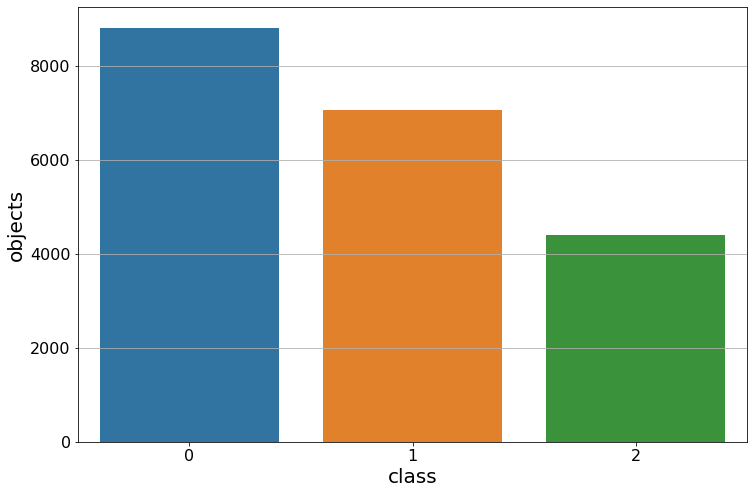

In [16]:
# get features and classes
features = dataset.columns[:-5].tolist()
classes  = dataset[target].unique().tolist()

# resume dataset
print('Objects = ', dataset.shape[0])
print('Features = ', len(features))
print('Classes = ', len(classes))
print(dataset.groupby(target)[target].count())

# plot number of objects per classe
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(x=target, data=dataset)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(target, fontsize=fs_axeslabels)
axes.set_ylabel('objects', fontsize=fs_axeslabels)
axes.yaxis.grid(True, which='major')
axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


# axes.set_ylabel('objects')
# axes.yaxis.grid(True, which='major')
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# fig.savefig(path_out + 'datasetbalancing.png', dpi=300)

plt.show()



## **Global Analysis**

Statistics

In [17]:
stats_all = pd.Series(dataset[features].values.flatten()).describe()
stats_names = stats_all.index.tolist()

s = [stats_all.values]
for c in classes:
    s.append(pd.Series(dataset.loc[dataset[target] == c].iloc[:, :-5].values.flatten()).describe().values)

summary = pd.DataFrame(s, columns=stats_names)
summary[target] = ['all'] + classes
summary
    

,count,mean,std,min,25%,50%,75%,max,class
0,"20,570,004.000","1,791.421",943.205,597.803,"1,207.430","1,569.590","2,132.050","28,945.500",all
1,"8,943,480.000","1,925.496",996.557,746.264,"1,295.190","1,686.560","2,254.530","28,945.500",0
2,"7,154,784.000","1,631.029",841.503,649.429,"1,034.790","1,424.310","1,922.660","15,188.200",1
3,"4,471,740.000","1,779.899",946.481,597.803,"1,149.260","1,600.810","2,134.400","17,333.200",2


## **Object Analysis**

Plot SERS Raman Shift

min (cm-1)  =  471.042
max (cm-1)  =  1611.19




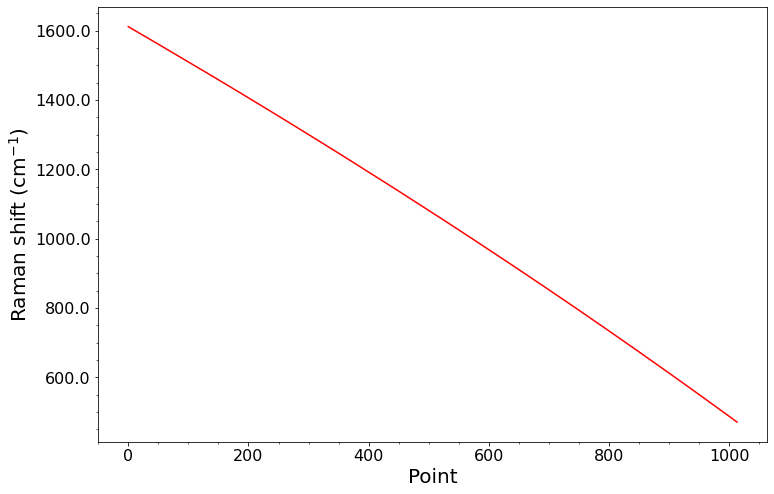

In [18]:
curve_x = np.array(features, dtype=float)

print('min (cm-1)  = ', curve_x.min())
print('max (cm-1)  = ', curve_x.max())
print('\n')

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.plot(curve_x, '-r')
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Point', fontsize=fs_axeslabels)
axes.set_ylabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()

# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# fig.savefig(path_out + 'ramanshift-scale.png', dpi=300)
plt.show()


Plot one instance

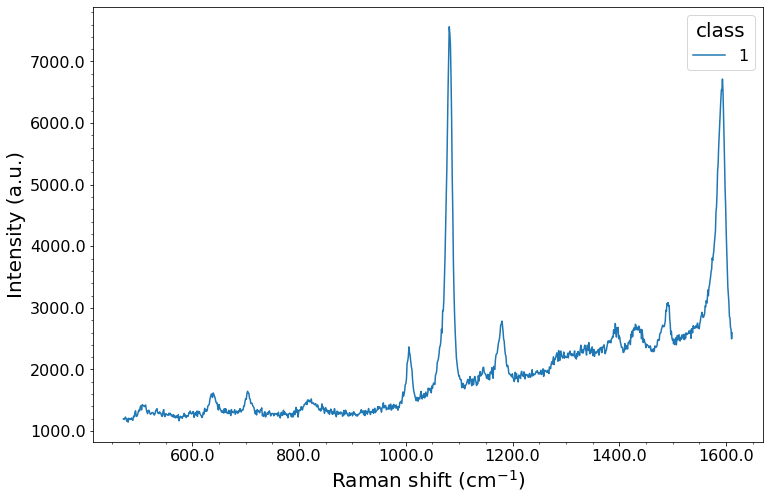

In [19]:
class_i = 1

curve_y = dataset.loc[dataset[target] == class_i].sample(n=1,random_state=seed)[features].values[0]

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.plot(curve_x, curve_y, label= str(class_i))
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
# axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)


# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# fig.savefig(path_out + 'spec_classes.png', dpi=300)
plt.show()





Plot one instance by class

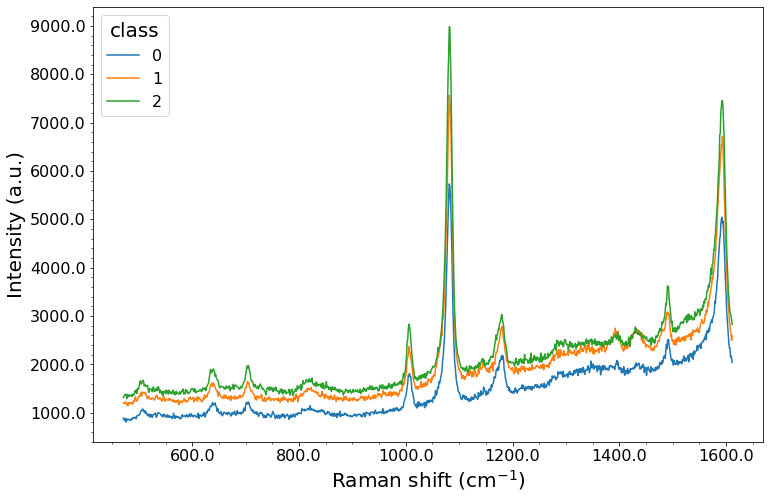

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

for class_i in classes:
    curve_y = dataset.loc[dataset[target] == class_i].sample(n=1,random_state=seed)[features].values[0]
    axes.plot(curve_x, curve_y, label= str(class_i))

axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
# axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)


# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# fig.savefig(path_out + 'spec_classes.png', dpi=300)
plt.show()





Plot one instance by class (band interval)

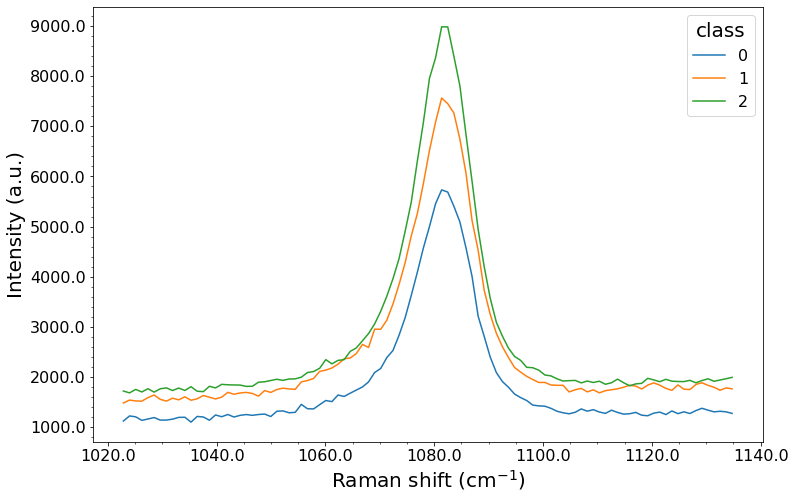

In [21]:
# parameters

delta = 50  # points from band index
# -------------------------------

band_index = dataset.columns.get_loc(band)
interval_names = dataset.columns[band_index-delta:band_index+delta+1].tolist()
interval_x = np.array(interval_names, dtype=float)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))

for class_i in classes:
    interval_y = dataset.loc[dataset[target] == class_i].sample(n=1,random_state=seed).loc[:, interval_names].values[0]
    axes.plot(interval_x, interval_y, label= str(class_i))

axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
# axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# fig.savefig(path_out + 'spec_classes.png', dpi=300)
plt.show()





Plot a set of instances by class

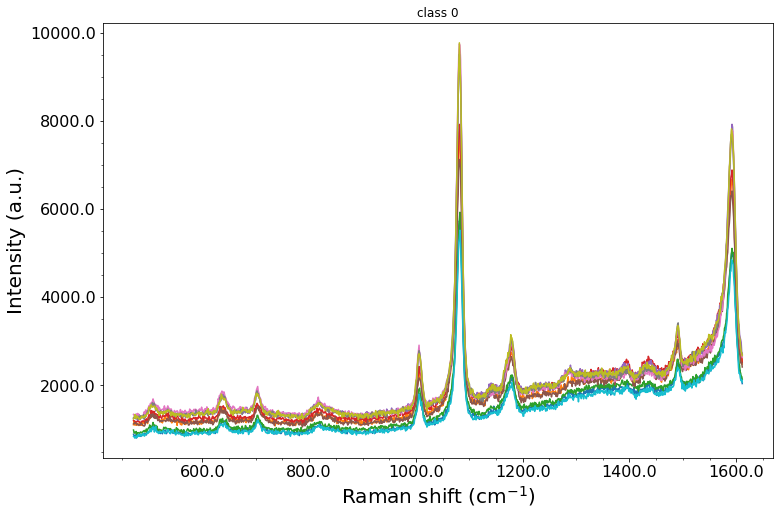

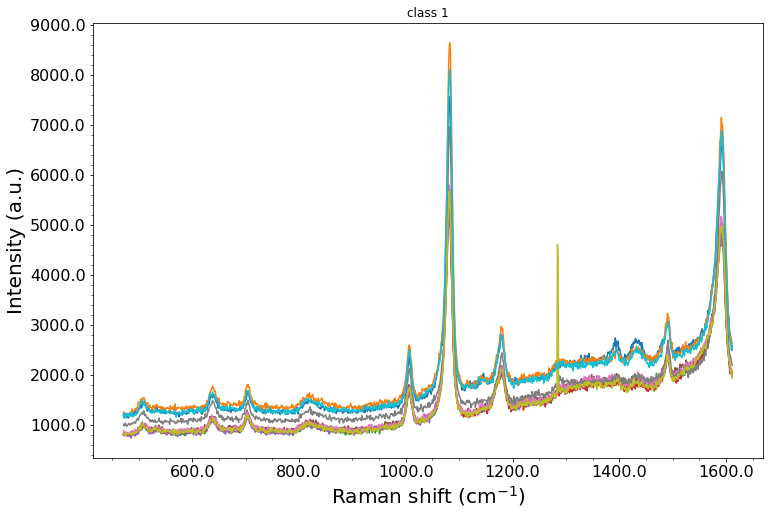

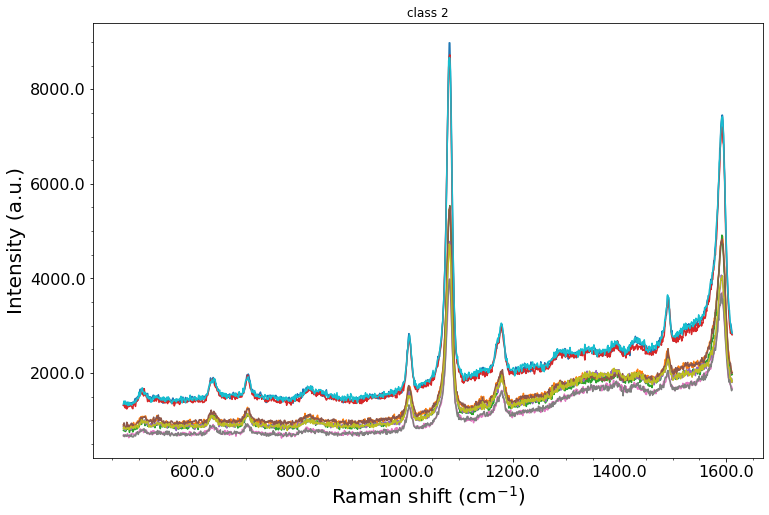

In [22]:
# parameters
n = 10 # quantity of spectra
# -------------------------------

for class_i in classes:
    
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    curves = dataset.loc[dataset[target] == class_i][features].sample(n=10,random_state=seed).values

    for curve_y in curves:
        axes.plot(curve_x, curve_y)

    axes.set_title('class ' + str(class_i))
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
    axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
    # axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axes.minorticks_on()

    # annot = '({0})'.format(exp_id)
    # axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
    # fig.savefig(path_out + 'spec_classes.png', dpi=300)
    plt.show()





Object Statistics

In [23]:
# get statistics of instances (sers)
# inst = pd.DataFrame(dataset.iloc[:, :-1].values.T)
# inst_stats = inst.describe().T
# inst_stats['class'] = dataset['class']
# inst_stats

stats_obj = dataset[features].T.describe().T
stats_obj[target] = dataset[target]
stats_obj


,count,mean,std,min,25%,50%,75%,max,class
0,"1,014.000","2,041.343","1,039.181","1,247.800","1,429.460","1,779.730","2,223.275","9,499.090",0
1,"1,014.000","2,049.502","1,044.782","1,204.320","1,427.505","1,786.325","2,225.467","9,530.390",0
2,"1,014.000","2,083.413","1,054.711","1,260.430","1,464.465","1,820.970","2,267.190","9,666.760",0
3,"1,014.000","2,088.054","1,056.428","1,281.990","1,458.463","1,841.105","2,266.430","9,756.190",0
4,"1,014.000","2,087.916","1,060.068","1,253.320","1,455.493","1,837.665","2,266.730","9,575.040",0
...,...,...,...,...,...,...,...,...,...
20281,"1,014.000","1,202.105",568.639,607.401,735.249,"1,055.945","1,623.043","3,882.370",2
20282,"1,014.000","1,200.015",564.393,625.207,732.562,"1,042.805","1,634.508","3,905.600",2
20283,"1,014.000","1,203.778",572.543,634.897,732.825,"1,057.650","1,628.898","3,981.610",2
20284,"1,014.000","1,198.269",566.394,611.810,731.824,"1,039.570","1,621.477","3,957.920",2


Boxplot of Objects Statistics

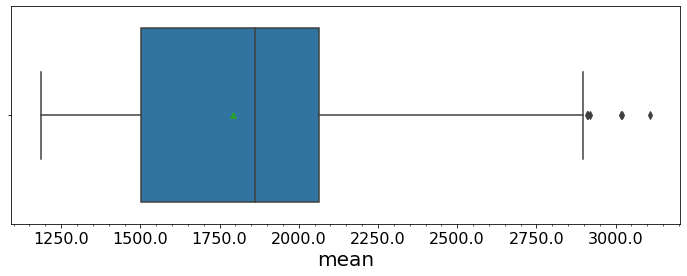

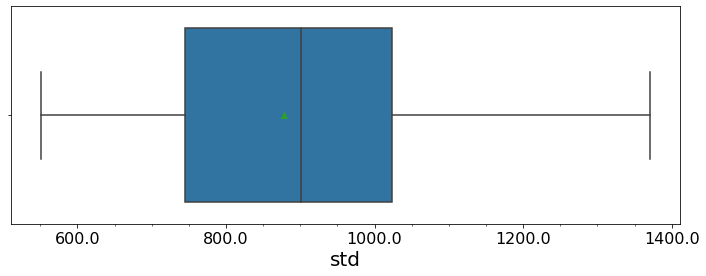

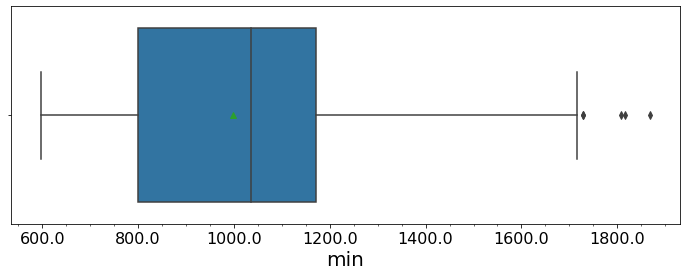

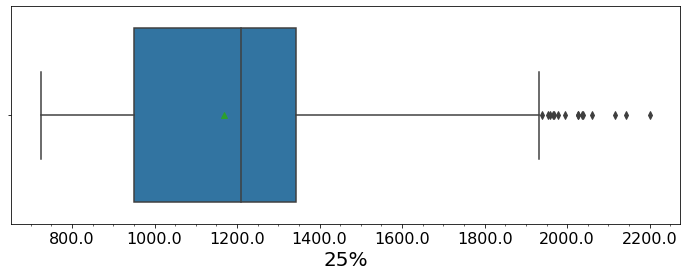

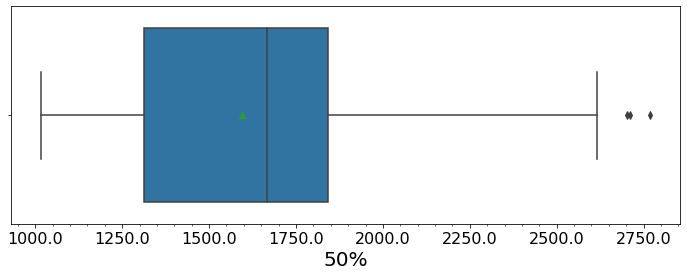

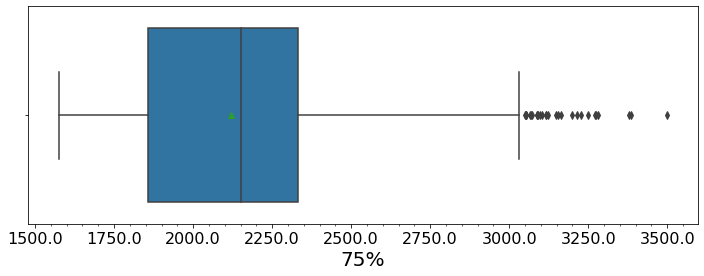

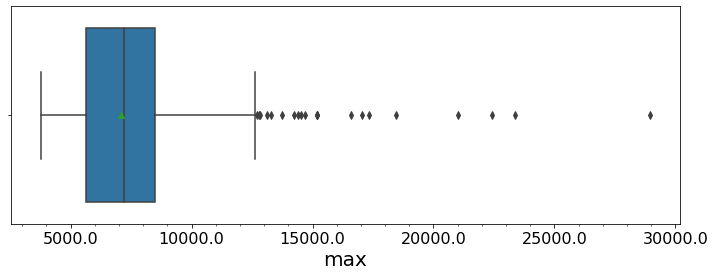

In [24]:
for s in stats_obj.columns[1:-1]:
    
    fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    sns.boxplot(x=s, showmeans=True, data=stats_obj, ax=axes)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
    axes.yaxis.set_ticklabels([])
    axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.minorticks_on()
    plt.show()


Histogram of Objects Statistics

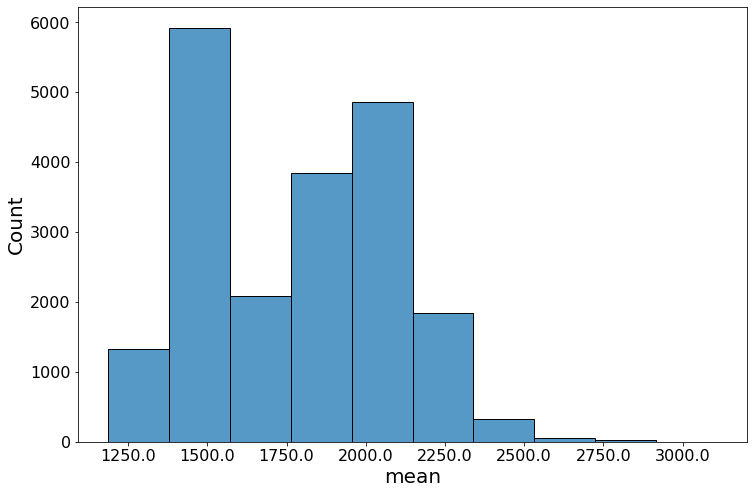

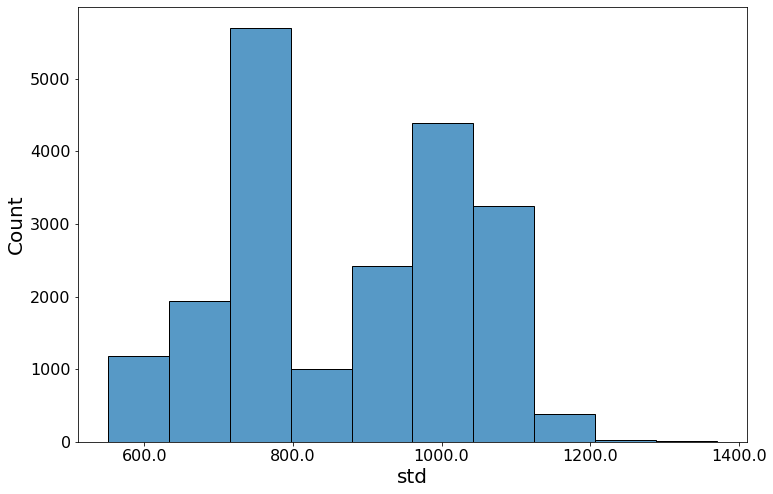

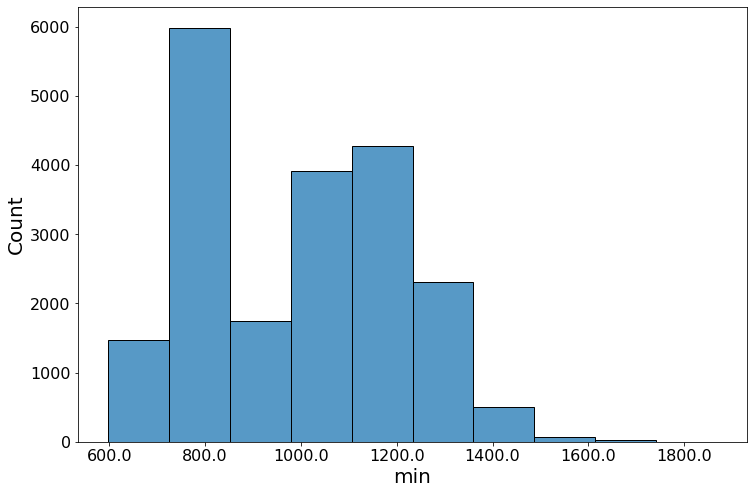

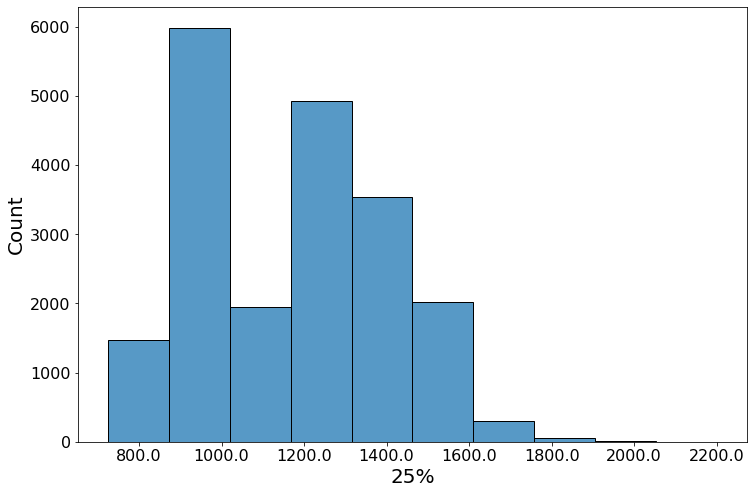

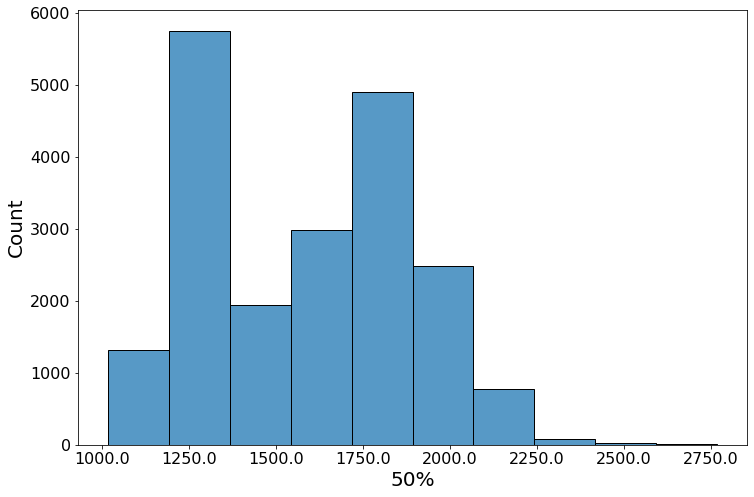

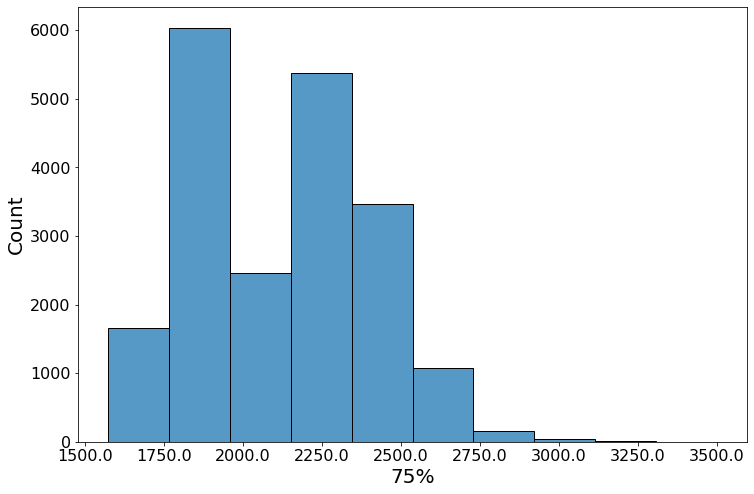

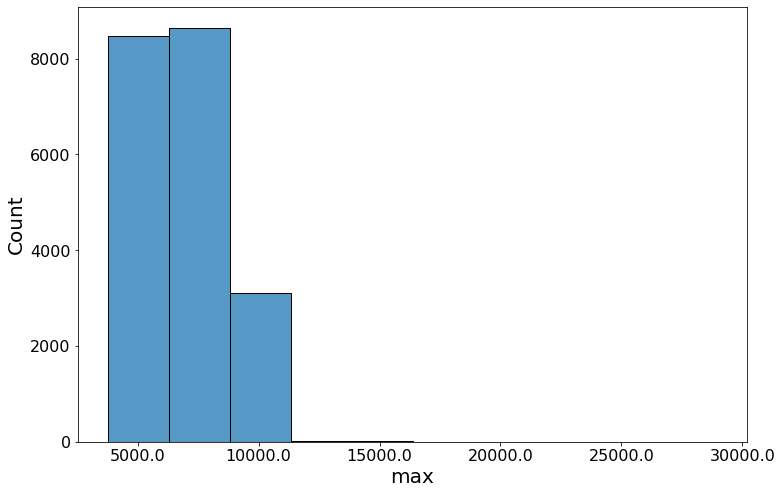

In [25]:
for s in stats_obj.iloc[:, 1:-1]:
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    sns.histplot(x=s, bins = 10, data=stats_obj.iloc[:, 1:-1], ax=axes)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
    axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)

    axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    plt.show()

Histogram of Summary Statistics - By Class

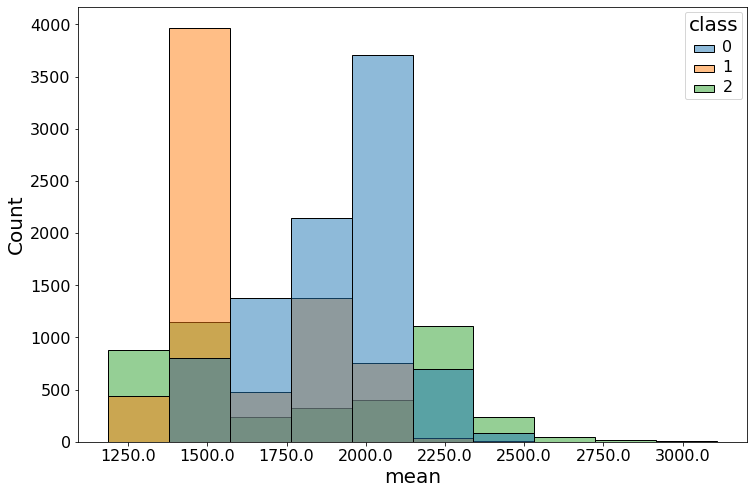

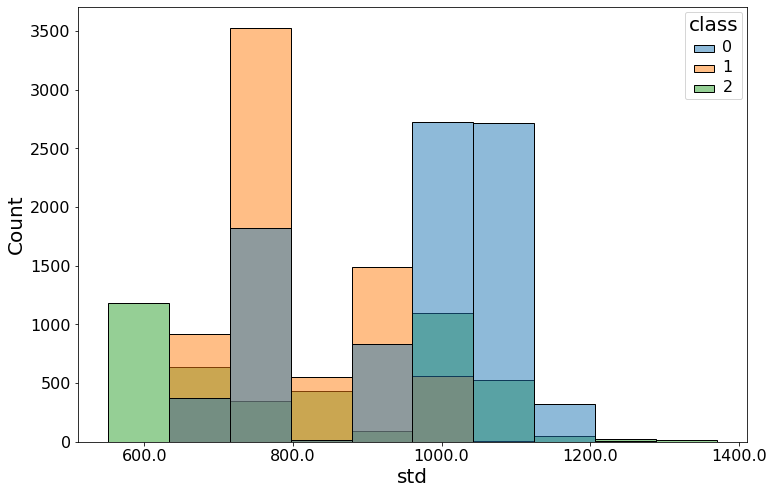

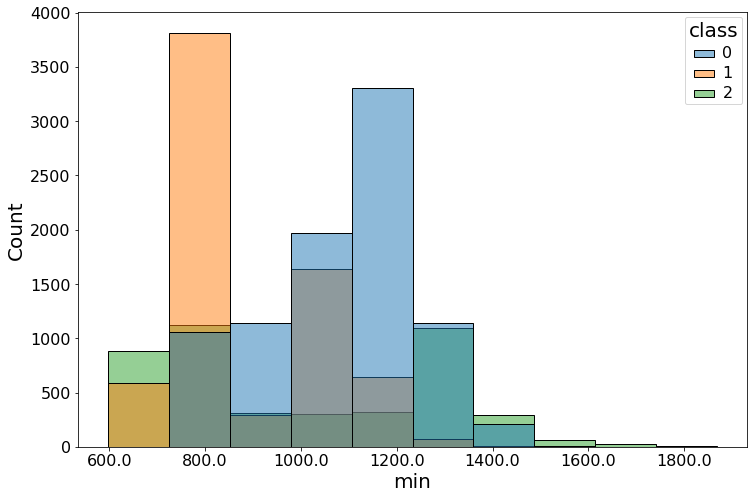

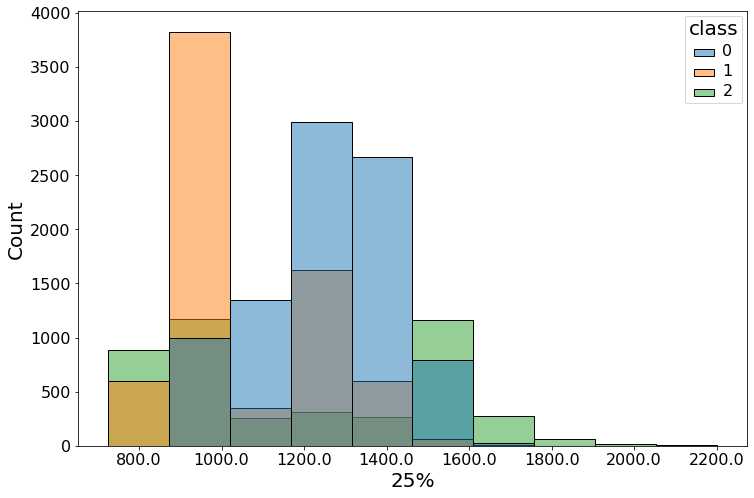

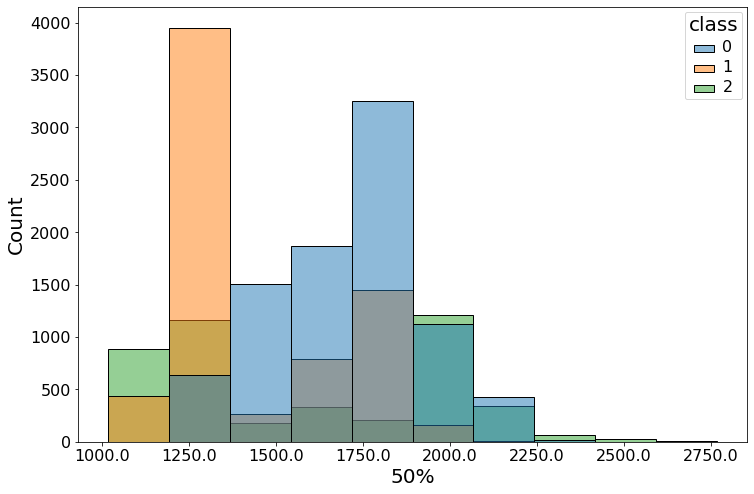

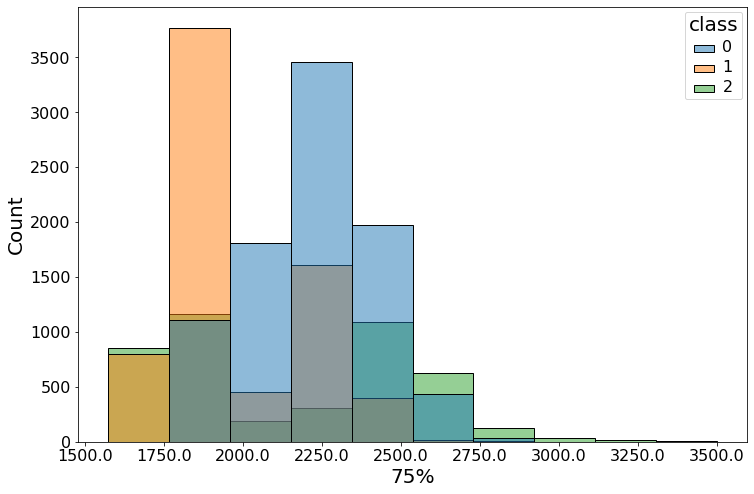

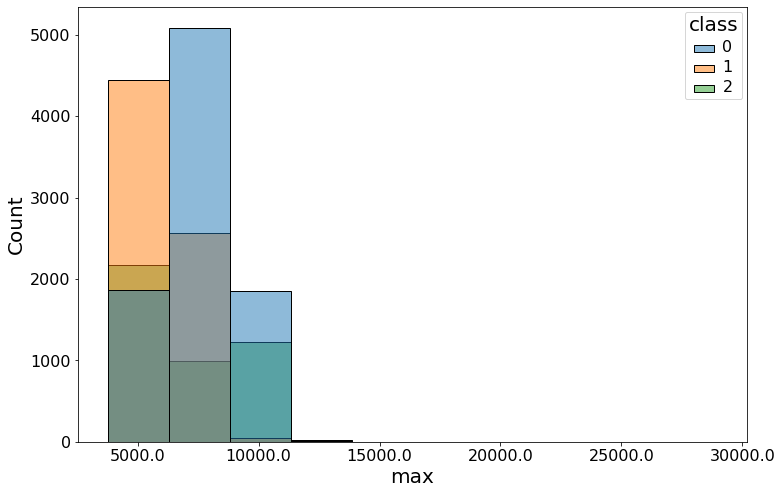

In [26]:
for s in stats_obj.iloc[:, 1:-1]:

    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    sns.histplot(x=s, hue=target, bins = 10, palette='tab10', legend=True, data=stats_obj.iloc[:, 1:], ax=axes)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
    axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)

    axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
    plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
    plt.show()


Boxplot of Objects Statistics - By Class

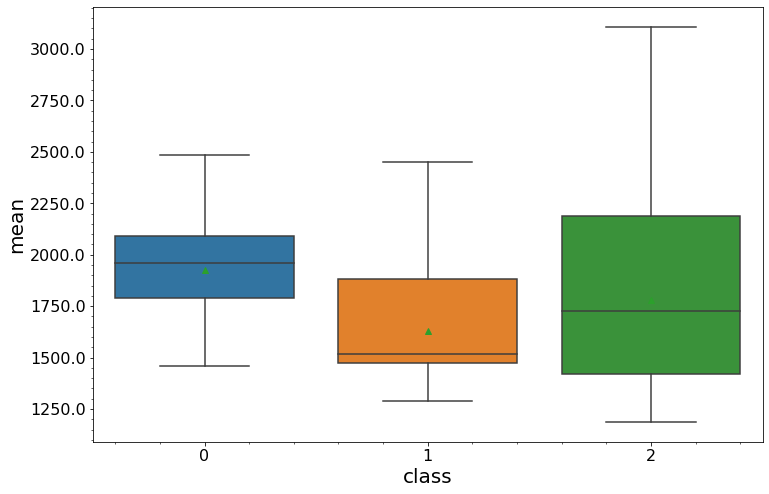

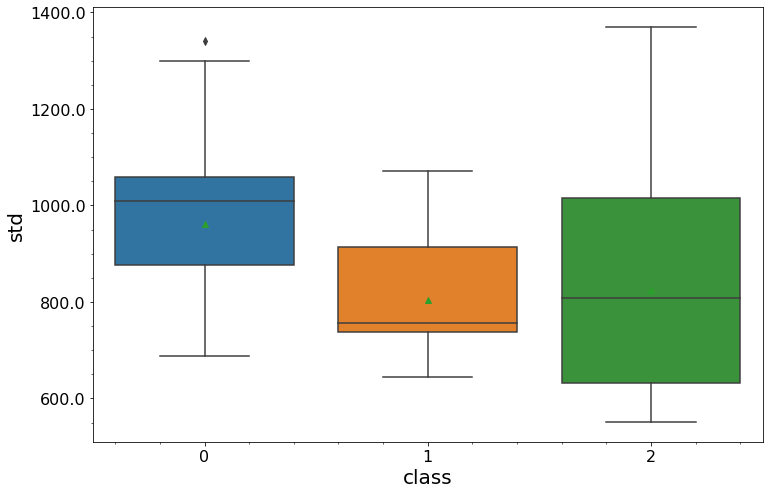

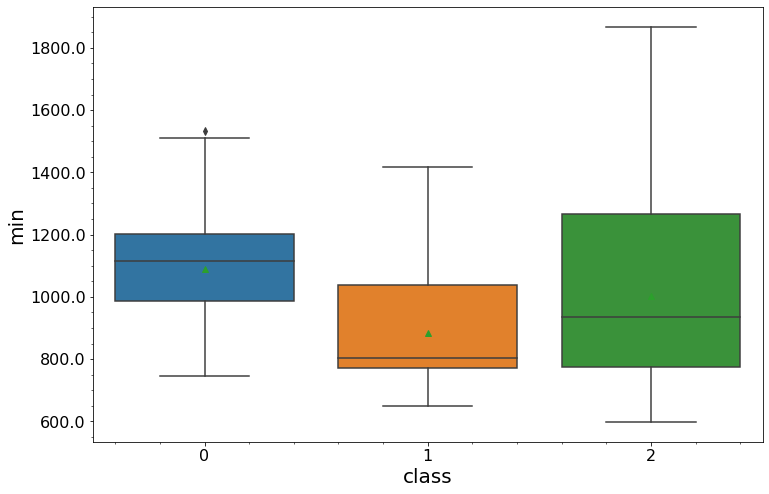

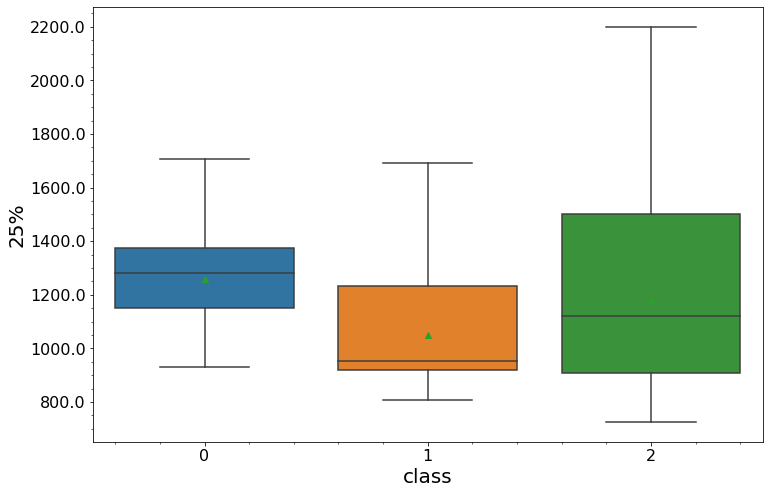

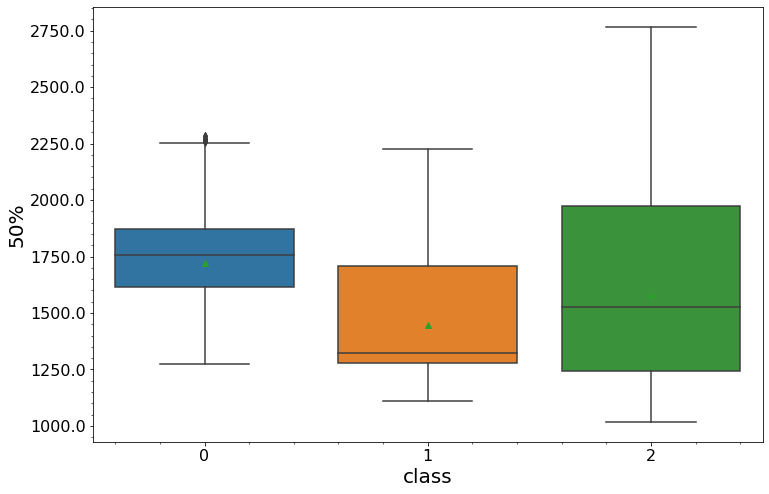

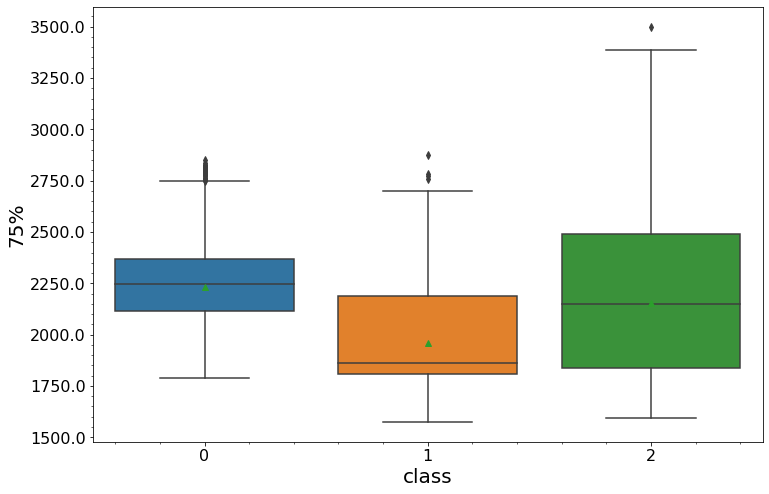

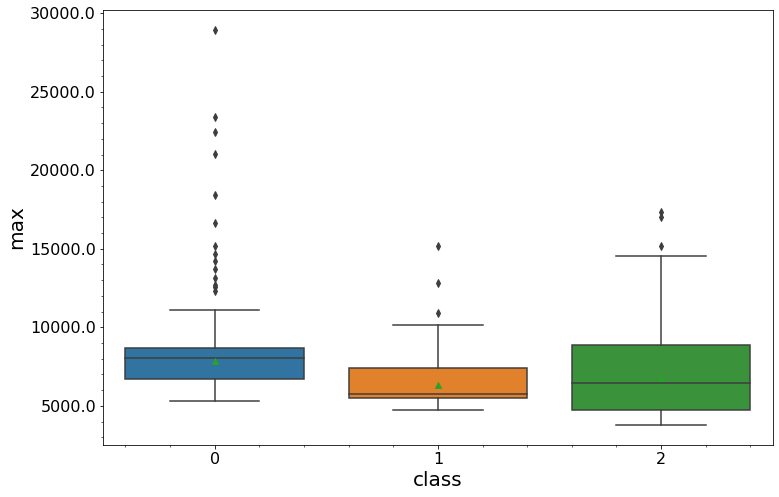

In [27]:
# plot boxplot of statistics
for s in stats_obj.columns[1:-1]:
    
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    sns.boxplot(x=target, y=s, showmeans=True, data=stats_obj, ax=axes)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
    axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
    axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.minorticks_on()
    
    plt.show()


K-S Test for the Objects Statistics

In [28]:
# k-s test
# https://towardsdatascience.com/when-to-use-the-kolmogorov-smirnov-test-dd0b2c8a8f61

# if p_value < 0.05 (5.000E-2) then H0 can be rejected and distributions are differents
# ks score: max is 1.0 (100 %)

ks_list = []

for s in stats_obj.columns[1:-1]:
    stats_class0 = stats_obj.loc[stats_obj[target] == 0][s]
    stats_class1 = stats_obj.loc[stats_obj[target] == 1][s]
    ks_stat, p_value = stats.ks_2samp(stats_class0, stats_class1)
    ks_list.append([s, ks_stat, p_value])

ks_df = pd.DataFrame(ks_list, columns=['stats', 'ks_score', 'p_value'])

# pandas display
pd.options.display.float_format = "{:,.3E}".format
print(ks_df.sort_values(by=['p_value']))

pd.options.display.float_format = "{:,.3f}".format

  stats  ks_score   p_value
0  mean 5.346E-01 1.000E+00
1   std 5.890E-01 1.000E+00
2   min 5.228E-01 1.000E+00
3   25% 5.366E-01 1.000E+00
4   50% 5.557E-01 1.000E+00
5   75% 5.489E-01 1.000E+00
6   max 4.858E-01 1.000E+00


## **Univariate Analysis**

Features Statistics

In [29]:
# get statistics of instances (sers)
# inst = pd.DataFrame(dataset.iloc[:, :-1].values.T)
# inst_stats = inst.describe().T
# inst_stats['class'] = dataset['class']
# inst_stats

stats_feat = dataset[features].describe().T
stats_feat['skew'] = dataset[features].skew().T   # assimetry: left (skew < 0), right (skew > 0)
stats_feat['kurt'] = dataset[features].kurt().T   # peakedness: flat (kurt < 3), peak (kurt > 3)
stats_feat



,count,mean,std,min,25%,50%,75%,max,skew,kurt
1611.19,"20,286.000","2,352.300",361.838,"1,526.030","2,029.520","2,411.025","2,658.720","3,930.830",0.020,-0.868
1610.19,"20,286.000","2,390.670",370.576,"1,545.940","2,063.750","2,449.610","2,703.530","4,005.510",0.018,-0.885
1609.18,"20,286.000","2,442.250",382.299,"1,580.450","2,103.120","2,501.350","2,767.660","4,188.820",0.017,-0.899
1608.18,"20,286.000","2,498.795",393.992,"1,619.930","2,147.460","2,558.040","2,836.117","4,284.960",0.007,-0.915
1607.17,"20,286.000","2,569.343",410.193,"1,661.870","2,204.210","2,629.630","2,920.710","4,356.190",0.001,-0.939
...,...,...,...,...,...,...,...,...,...,...
476.105,"20,286.000","1,046.063",215.956,622.615,843.989,"1,081.180","1,223.490","1,927.140",0.152,-1.021
474.84,"20,286.000","1,044.103",215.213,612.581,841.805,"1,078.930","1,221.210","1,926.670",0.151,-1.016
473.574,"20,286.000","1,048.575",216.073,612.431,847.525,"1,082.620","1,226.840","1,932.120",0.145,-1.037
472.308,"20,286.000","1,047.513",215.890,610.305,845.341,"1,080.380","1,224.560","1,894.120",0.150,-1.029


K-S Test for the features distributions over the classes

In [30]:
# # k-s test
# # https://towardsdatascience.com/when-to-use-the-kolmogorov-smirnov-test-dd0b2c8a8f61

# # if p_value < 0.05 (5.000E-2) then H0 can be rejected and distributions are differents
# # ks score: max is 1.0 (100 %)

# ks_list = []

# for col in dataset[features]:
#     class_0 = dataset.loc[dataset[target] == 0][col]
#     class_1 = dataset.loc[dataset[target] == 1][col]
#     ks_stat, p_value = stats.ks_2samp(class_0, class_1)
#     ks_list.append([col, ks_stat, p_value])

# ks_df = pd.DataFrame(ks_list, columns=['col', 'ks_score', 'p_value'])

# # pandas display
# pd.options.display.float_format = "{:,.3E}".format
# ks_df.sort_values(by=['p_value'])

In [31]:
# dist_diff = ks_df[ks_df['p_value'] <= 5E-2].sort_values(by=['p_value'])
# print(dist_diff)
# print('\nFeatures with different distributions: ', dist_diff.shape[0])

In [32]:
pd.options.display.float_format = "{:,.3f}".format

Plot features stats by class

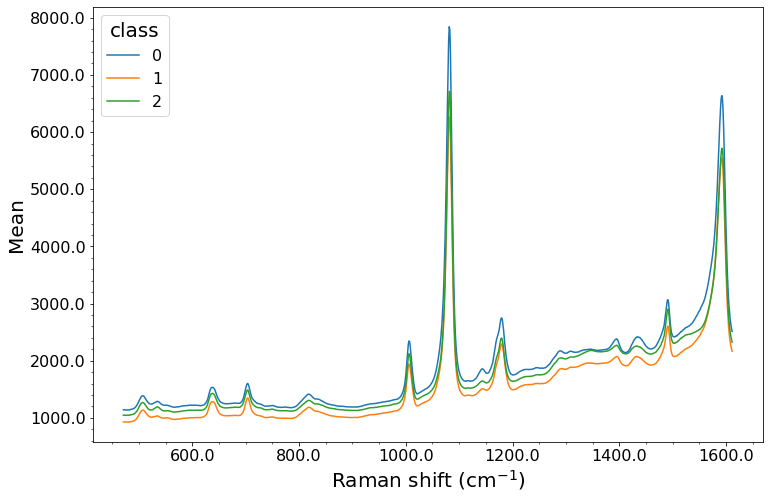

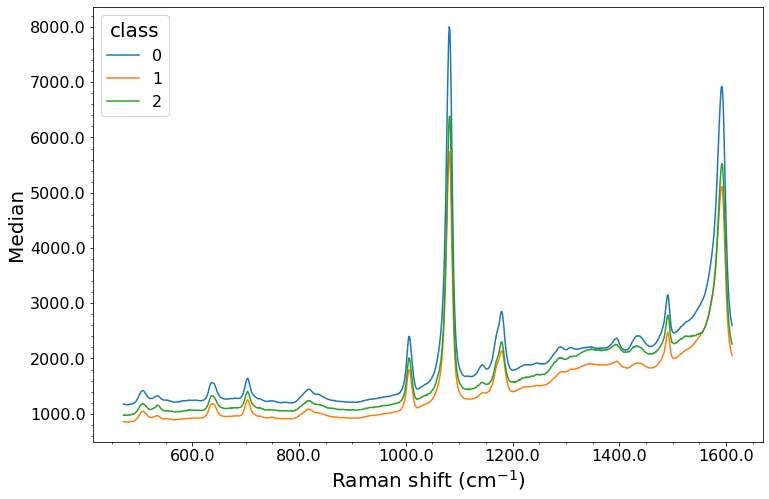

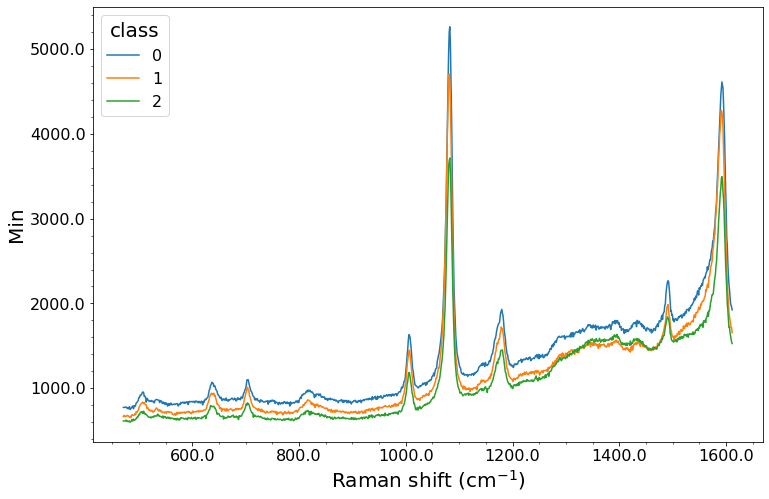

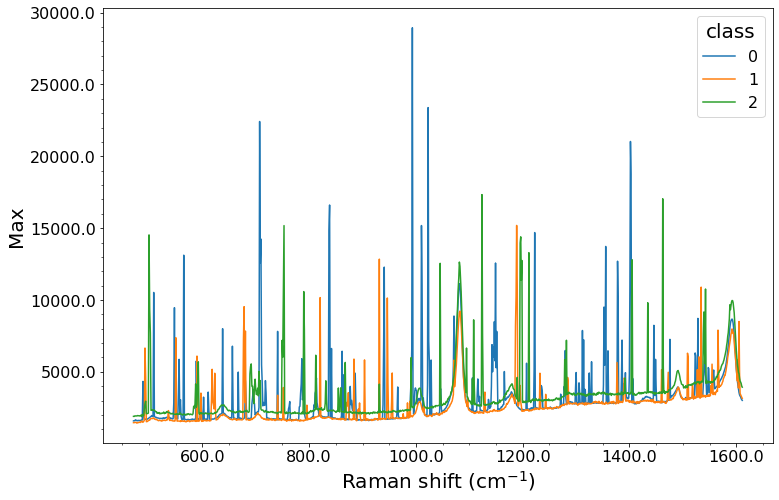

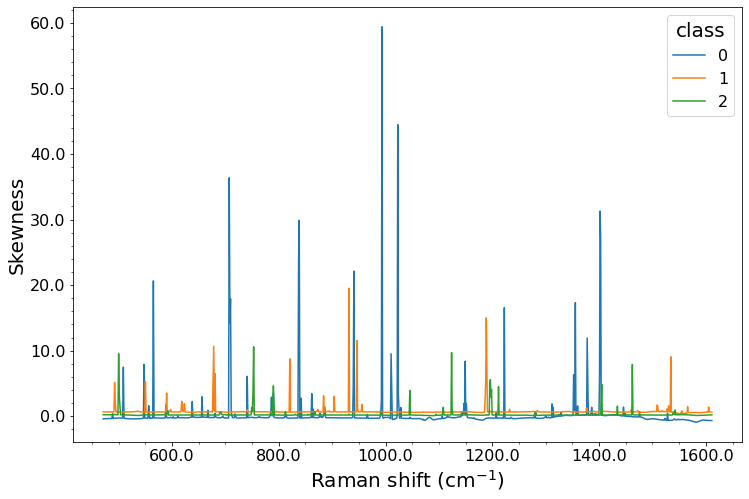

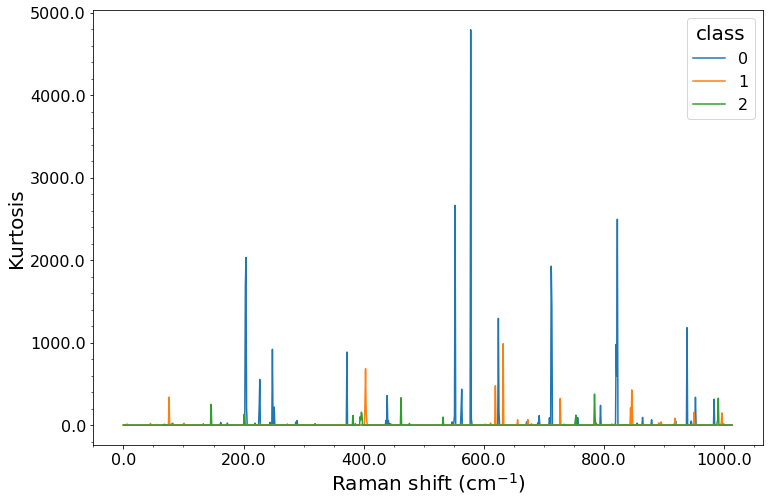

In [33]:
#figsize=(width, height)
#axes[0] if subplots more than 1

# Mean
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gmean = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').mean().T.reset_index().astype(float)
gmean.plot.line(x='index', ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Mean', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-mean.png', dpi=300)
plt.show()

# Median
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gmedian = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').median().T.reset_index().astype(float)
gmedian.plot.line(x='index',ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Median', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-median.png', dpi=300)
plt.show()

# Min
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gmin = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').min().T.reset_index().astype(float)
gmin.plot.line(x='index',ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Min', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-min.png', dpi=300)
plt.show()

# Max
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gmax = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').max().T.reset_index().astype(float)
gmax.plot.line(x='index',ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Max', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-max.png', dpi=300)
plt.show()

# Skewness or assimetry: left (skew < 0), right (skew > 0)
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gskew = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').skew().T.reset_index().astype(float)
gskew.plot.line(x='index',ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Skewness', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-max.png', dpi=300)
plt.show()

# Kurtosis - peak shape: flat (kurt < 3), peak (kurt > 3)
# ---
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
gkurt = dataset.drop(['x', 'y', 'copy', 'map'], axis=1).groupby('class').apply(pd.DataFrame.kurt)
gkurt.reset_index(drop=True, inplace=True)
gkurt.drop(['class'], axis=1, inplace=True)
gkurt = gkurt.T.reset_index()
gkurt.plot.line(x='index', ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Kurtosis', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.legend(title='class', fontsize=fs_legend, title_fontsize=fs_legend_title)
# annot = '({0})'.format(exp_id)
# axes.text(1.0, 1.07, annot, transform = axes.transAxes, verticalalignment ='top', horizontalalignment ='right')
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
# fig.savefig(path_out + 'feat-class-max.png', dpi=300)
plt.show()

## **Multivariate Analysis**

Covariance analysis

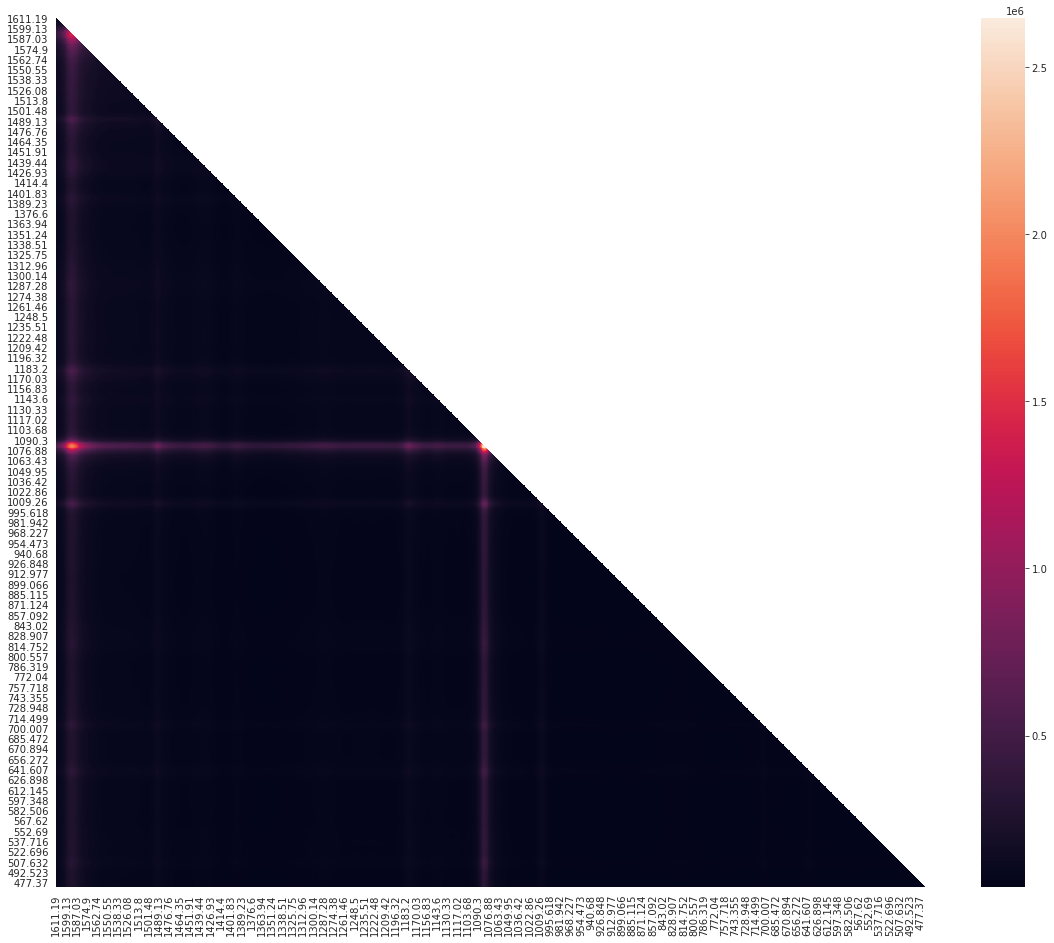

In [34]:
covar = dataset[features].cov()
mask = np.zeros_like(covar)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 16))
    ax = sns.heatmap(covar, mask=mask, square=True)

Statistics of covariances

In [35]:
v_covar = pd.DataFrame(covar.values[np.tril_indices(n=covar.shape[0], k=-1)], columns=['covariance'])
v_covar.describe()


,covariance
count,"513,591.000"
mean,"95,290.886"
std,"76,497.928"
min,"45,694.870"
25%,"61,761.748"
50%,"73,842.152"
75%,"96,680.599"
max,"2,648,762.165"


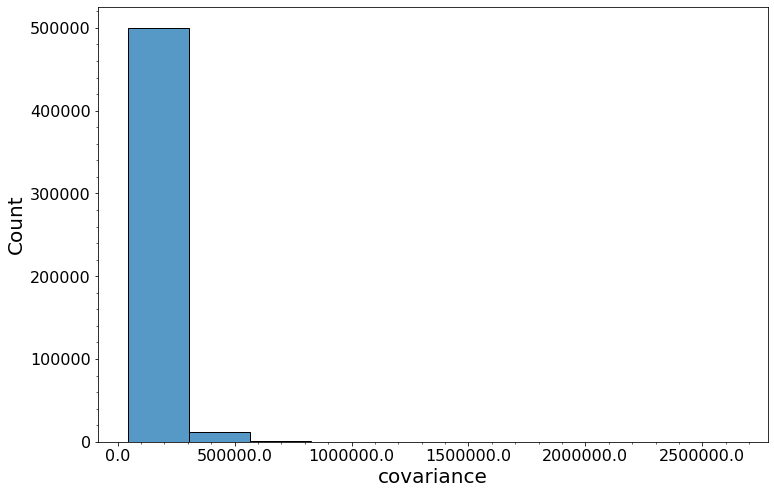

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(x='covariance', bins = 10, palette='tab10', data=v_covar, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)

axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
plt.show()


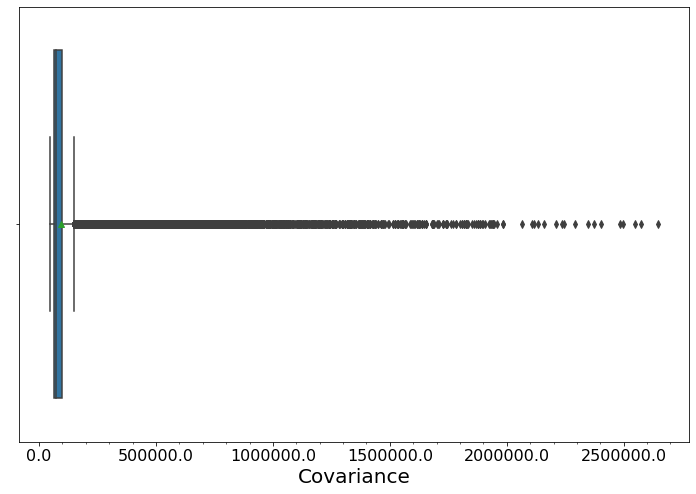

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x='covariance', palette='tab10', showmeans=True, data=v_covar, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(' ', size = fs_ticklabels)
axes.set_xlabel('Covariance', fontsize=fs_axeslabels)
axes.minorticks_on()
plt.show()


Correlation analysis

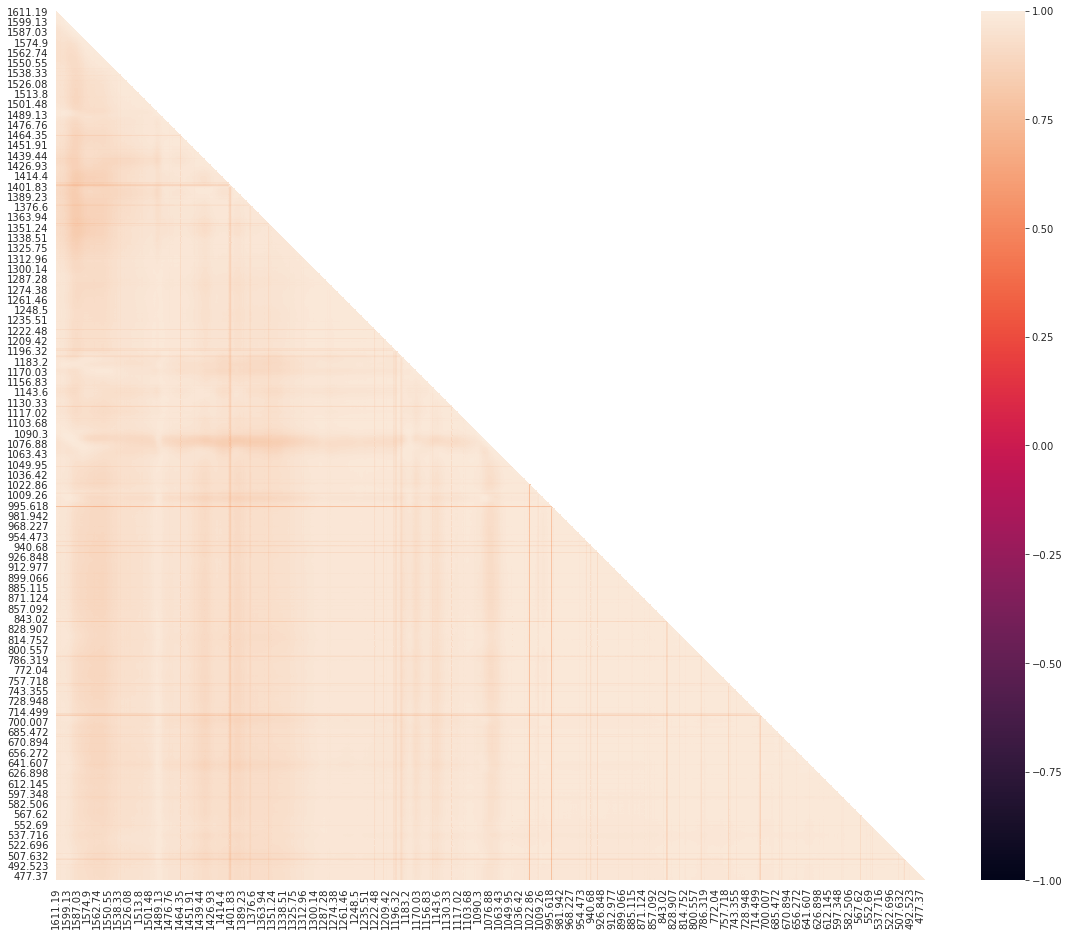

In [38]:
correl = dataset[features].corr()
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 16))
    ax = sns.heatmap(correl, vmin=-1, vmax=1, mask=mask, square=True)

plt.show()

Statistics of correlations

In [39]:
v_correl = pd.DataFrame(correl.values[np.tril_indices(n=correl.shape[0], k=-1)], columns=['correlation'])
v_correl.describe()


,correlation
count,"513,591.000"
mean,0.950
std,0.030
min,0.619
25%,0.933
50%,0.958
75%,0.973
max,0.997


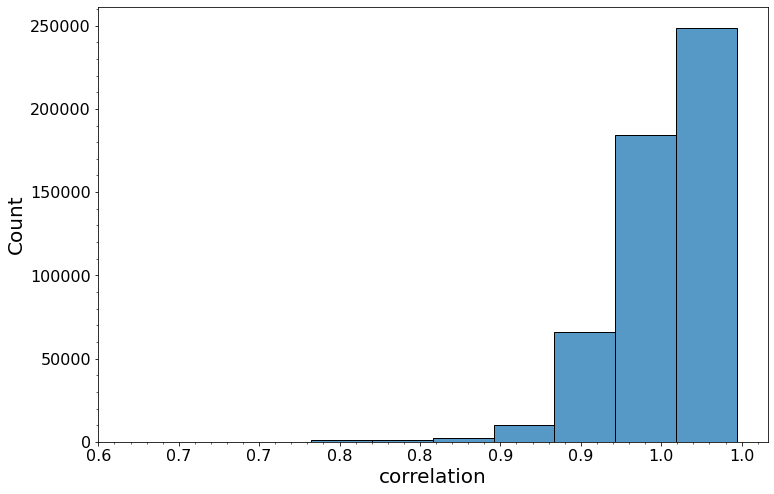

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(x='correlation', bins = 10, palette='tab10', data=v_correl, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)

axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
plt.show()


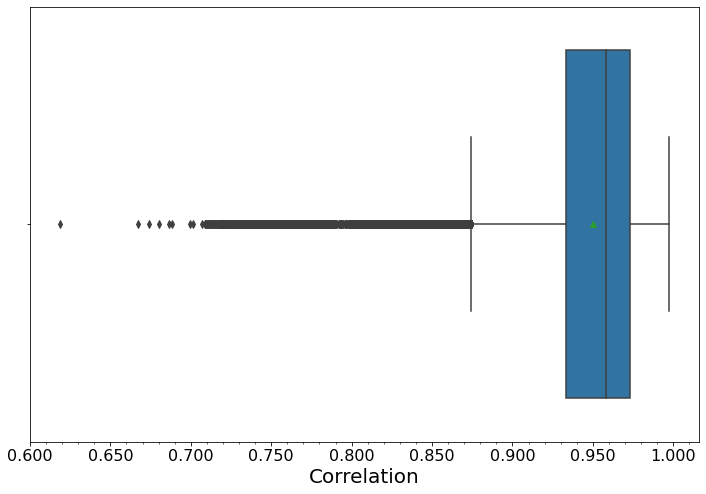

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x='correlation', palette='tab10', showmeans=True, data=v_correl, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(' ', size = fs_ticklabels)
axes.set_xlabel('Correlation', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.show()



## **Peak Analysis**

Find peaks

In [42]:
# from scipy.signal import find_peaks, peak_prominences

# # parameters
# band = '1079.03'  # substrato-11ago2021
# band = '1079.12'  # substrato-03set2021
index_delta = 50  # points from band index
# # -------------------------------

# # get interval bands to find maximum intensities
band_index = dataset.columns.get_loc(band)
interval_bands = dataset.columns[band_index-index_delta:band_index+index_delta+1].tolist()

# 27 = -11.139 mV
# interval_bands = dataset.columns[27:-1].tolist()

loc_list=[]
band_list=[]
prom_list=[]
width_half_list=[]
width_full_list=[]
q_factor=[]
class_list=[]

# find peaks and prominences
for i in range(len(dataset)):
    
    # x = dataset.iloc[i, :-5]
    x = dataset.loc[i, interval_bands]
    
    loc,_ = find_peaks(x)
    # print(loc)

    prominences = peak_prominences(x, loc)[0]
    # print(prominences)
    
    max_prom = np.max(prominences)
    # print(max_prom)
    # print([loc[np.argmax(prominences)]])

    others = np.delete(prominences,np.argmax(prominences))
    # print(others)

    if not np.where(others > max_prom/3)[0].any():

        band = x.index[loc[np.argmax(prominences)]]
        
        width_half_data = peak_widths(x, [loc[np.argmax(prominences)]], rel_height=0.5)
        width_half = abs(float(x.index[int(width_half_data[3])]) - float(x.index[int(width_half_data[2])]))
        # print(width_half)
        width_full_data = peak_widths(x, [loc[np.argmax(prominences)]], rel_height=1.0)
        width_full = abs(float(x.index[int(width_full_data[3])]) - float(x.index[int(width_full_data[2])]))
        # print(width_full)

        class_i = dataset.iloc[i, -1]
        
        print(i, band, max_prom, width_half, width_full, class_i)
    
        loc_list.append(i)
        band_list.append(band)
        prom_list.append(max_prom)
        width_half_list.append(width_half)
        width_full_list.append(width_full)
        class_list.append(class_i)


print('\nNumber of valid peaks: ', len(band_list))

peaks = pd.DataFrame({'loc': np.array(loc_list, dtype=int), 
                      'band': np.array(band_list, dtype=float), 
                      'prominence': np.array(prom_list, dtype=float),
                      'width_half': np.array(width_half_list, dtype=float),
                      'width_full': np.array(width_full_list, dtype=float),
                      'q_factor' : np.array(prom_list, dtype=float)/np.array(width_half_list, dtype=float),
                      'class': np.array(class_list, dtype=int)})

# peaks.info()
peaks



0 1081.36 7858.9800000000005 12.299999999999955 66.00999999999999 0
1 1081.36 7874.549999999999 12.299999999999955 82.81999999999994 0
2 1081.36 7965.91 12.299999999999955 67.13999999999987 0
3 1081.36 8058.630000000001 12.299999999999955 89.42000000000007 0
4 1082.48 7867.050000000001 12.299999999999955 66.0 0
5 1081.36 8118.180000000001 12.299999999999955 67.13999999999987 0
6 1081.36 8139.040000000001 12.299999999999955 89.39999999999986 0
7 1081.36 8323.12 12.299999999999955 86.04999999999995 0
8 1082.48 8016.0 12.299999999999955 64.90999999999985 0
9 1081.36 8037.339999999999 12.299999999999955 80.54999999999995 0
10 1081.36 8212.58 12.299999999999955 81.59999999999991 0
11 1081.36 8277.65 12.299999999999955 82.75 0
12 1081.36 8151.779999999999 12.299999999999955 72.69000000000005 0
13 1081.36 8122.65 12.299999999999955 83.74000000000001 0
14 1081.36 8416.32 12.299999999999955 90.53999999999996 0
15 1082.48 8102.72 12.299999999999955 72.77999999999997 0
16 1081.36 8260.71 12.29999

,loc,band,prominence,width_half,width_full,q_factor,class
0,0,"1,081.360","7,858.980",12.300,66.010,638.941,0
1,1,"1,081.360","7,874.550",12.300,82.820,640.207,0
2,2,"1,081.360","7,965.910",12.300,67.140,647.635,0
3,3,"1,081.360","8,058.630",12.300,89.420,655.173,0
4,4,"1,082.480","7,867.050",12.300,66.000,639.598,0
...,...,...,...,...,...,...,...
20269,20281,"1,080.240","2,907.054",12.300,52.570,236.346,2
20270,20282,"1,081.360","2,943.551",12.300,52.560,239.313,2
20271,20283,"1,081.360","3,017.918",12.300,73.660,245.359,2
20272,20284,"1,082.480","3,002.614",12.300,55.930,244.115,2


Visualize one peak and it's characteristics

left_base  20 ( 1112.58  (cm-1)
central  48 ( 1081.36  (cm-1)
right_base  79 ( 1046.57  (cm-1)
prominence 7858.980  (a.u.)
width_half 12.300  (cm-1)
width_full 66.010  (cm-1)
q_factor 638.941  a.u./cm-1


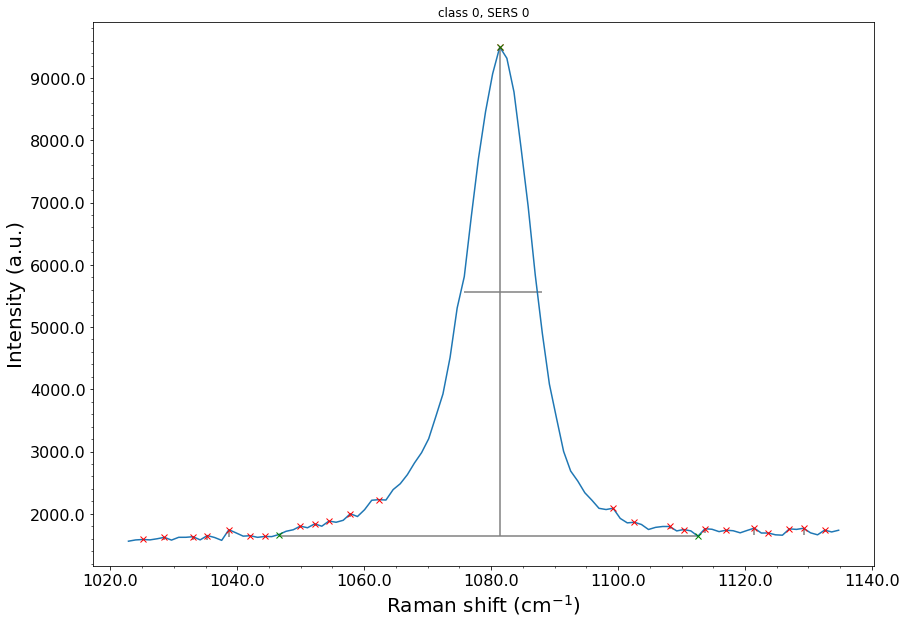

In [43]:
s = 0  # any peak
# s = 500 # no peak
# s = 1021 # low peak
# s = 2195 # big peak

# print(interval_bands)

curve_i = peaks.loc[0, 'loc']

x = dataset.loc[curve_i, interval_bands]
bands = np.array(interval_bands, dtype=float)
ind_class = int(dataset.loc[curve_i]['class'])

# print(type(x), x)
# print(x)

loc, _ = find_peaks(x)
# print(inds)

prominences = peak_prominences(x, loc)[0]
# print(prominences)

max_prom = np.max(prominences)
# print(max_prom)
# print([loc[np.argmax(prominences)]])

others = np.delete(prominences,np.argmax(prominences))
# print(others)

if not np.where(others > max_prom/3)[0].any():

    band_ = bands[loc[np.argmax(prominences)]]
    # band_ = x.index[loc[np.argmax(prominences)]]

    # x.index

    width_half_data = peak_widths(x, [loc[np.argmax(prominences)]], rel_height=0.5)
    width_half = abs(float(bands[int(width_half_data[3])]) - float(bands[int(width_half_data[2])]))

    width_full_data = peak_widths(x, [loc[np.argmax(prominences)]], rel_height=1.0)
    left_base = int(width_full_data[2])
    right_base = int(width_full_data[3])
    width_full = abs(float(bands[int(width_full_data[3])]) - float(bands[int(width_full_data[2])]))

    print('left_base ', left_base, '(', bands[left_base], ' (cm-1)')
    print('central ', loc[np.argmax(prominences)], '(', band_, ' (cm-1)')
    print('right_base ', right_base, '(', bands[right_base], ' (cm-1)')
    print('prominence %.3f' % max_prom, ' (a.u.)')
    print('width_half %.3f' % width_half, ' (cm-1)')
    print('width_full %.3f' % width_full, ' (cm-1)')
    print('q_factor %.3f' % (max_prom / width_half), ' a.u./cm-1')


    fig, axes = plt.subplots(1, 1, figsize=(14, 10))
    # plt.figure(figsize=(14,10))

    # spectrum
    axes.plot(bands, x)
    # plt.plot(interval_bands, x.values)


    # # peaks
    axes.plot(bands[loc], x[loc], "x", color='red')
    contour_heights = x[loc] - prominences

    # # # max prominence
    axes.vlines(x=bands[loc], ymin=contour_heights, ymax=x[loc], color='gray')

    # # # valid peak - height
    axes.plot(bands[loc[np.argmax(prominences)]], x[loc[np.argmax(prominences)]], "x", color='green')

    # # # valid peak - left base
    axes.plot(bands[left_base], x[left_base], "x", color='green')

    # # # valid peak - right base
    axes.plot(bands[right_base], x[right_base], "x", color='green')

    # # # valid peak - half width
    axes.hlines(int(width_half_data[1]), bands[int(width_half_data[2])], bands[int(width_half_data[3])], color='gray')

    # # # valid peak - full/base width
    axes.hlines(int(width_full_data[1]), bands[int(width_full_data[2])], bands[int(width_full_data[3])], color='gray')

    axes.set_title('class ' + str(ind_class) + ', SERS ' + str(curve_i))
    axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
    axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.minorticks_on()

    plt.show()


Statistics of the peaks

In [44]:
peaks.iloc[:, 1:-1].describe()

,band,prominence,width_half,width_full,q_factor
count,"20,274.000","20,274.000","20,274.000","20,274.000","20,274.000"
mean,"1,081.737","5,615.965",12.611,70.080,446.958
std,0.584,"1,374.756",0.540,7.965,114.704
min,"1,080.240","2,832.816",7.830,48.100,211.558
25%,"1,081.360","4,455.705",12.300,63.760,345.203
50%,"1,081.360","5,689.380",12.300,70.400,451.864
75%,"1,082.480","6,719.785",13.420,76.000,540.531
max,"1,083.600","10,630.170",14.530,99.670,"1,357.621"


Peaks counting by class

In [45]:
print(classes)
for class_i in classes:
    print(class_i, peaks.loc[peaks['class'] == class_i]['band'].count())


[0, 1, 2]
0 8816
1 7054
2 4404


Analysis of the peaks characteristics

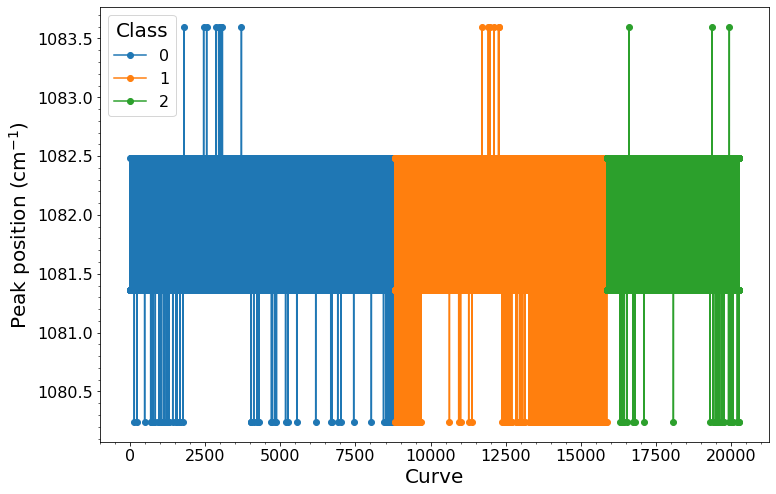

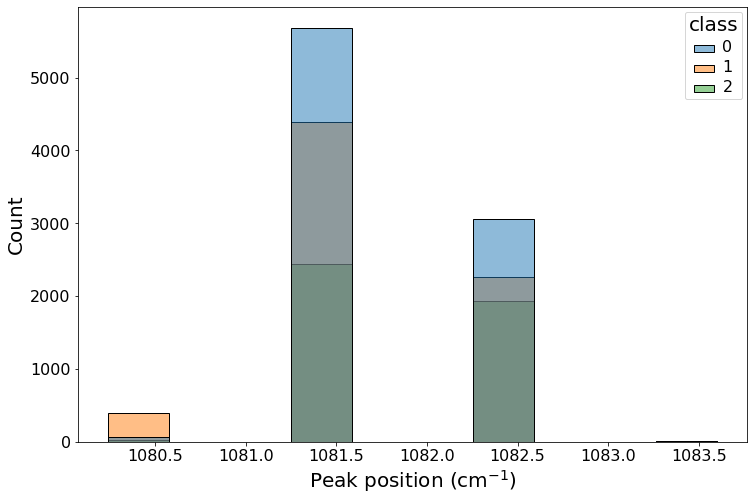

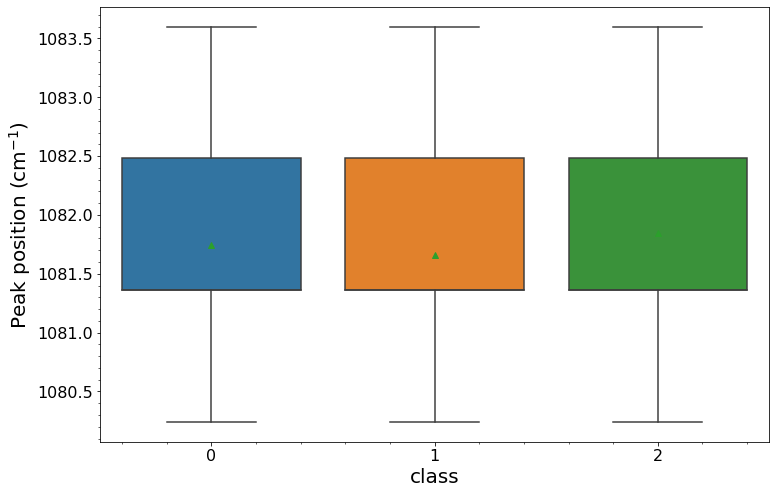

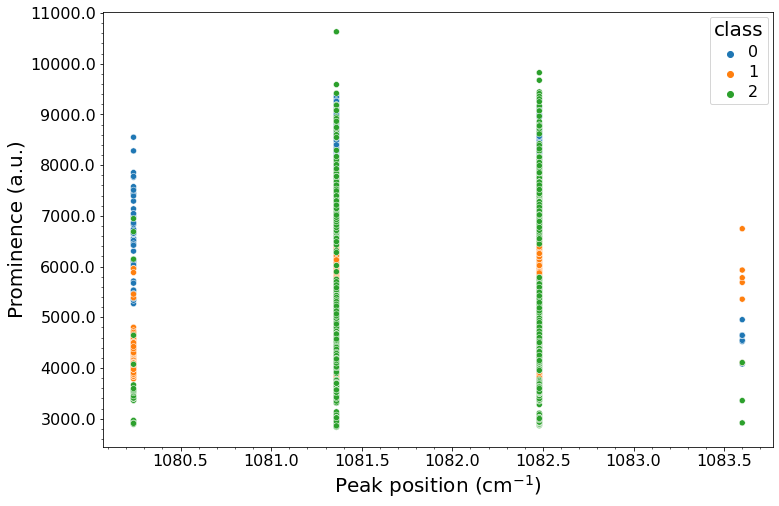

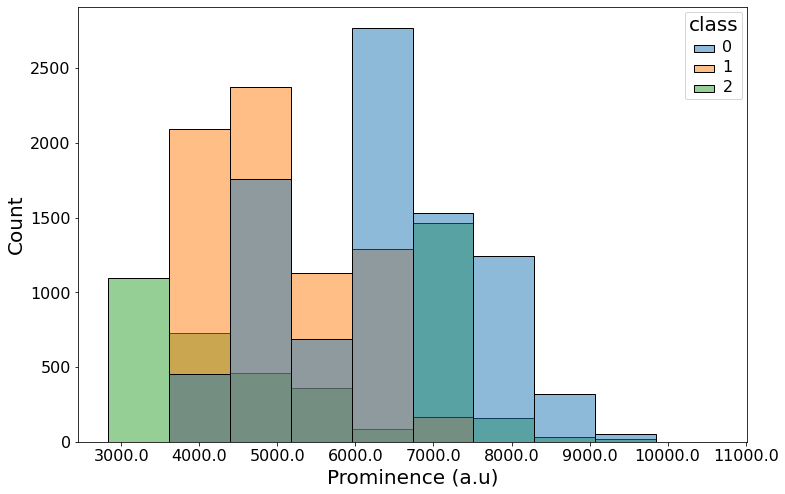

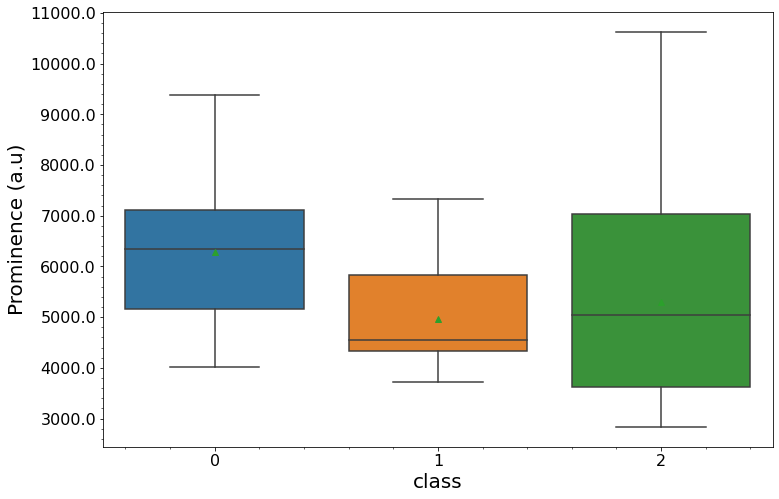

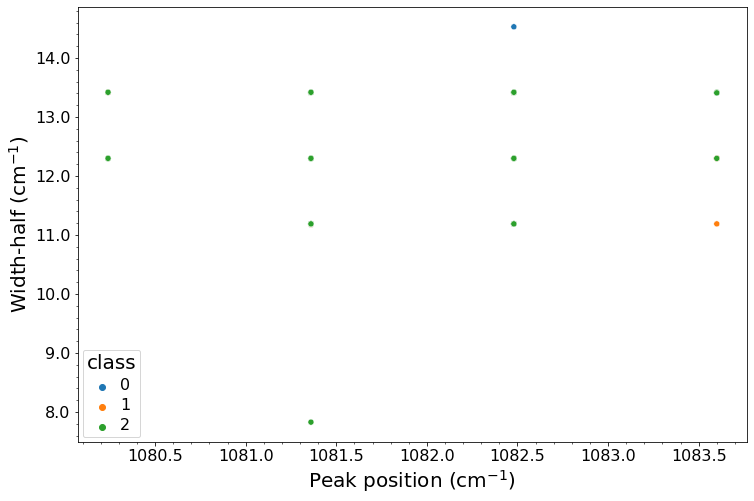

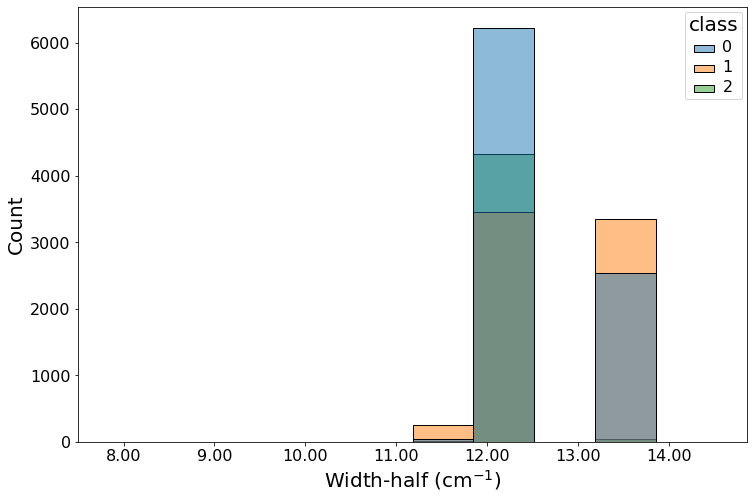

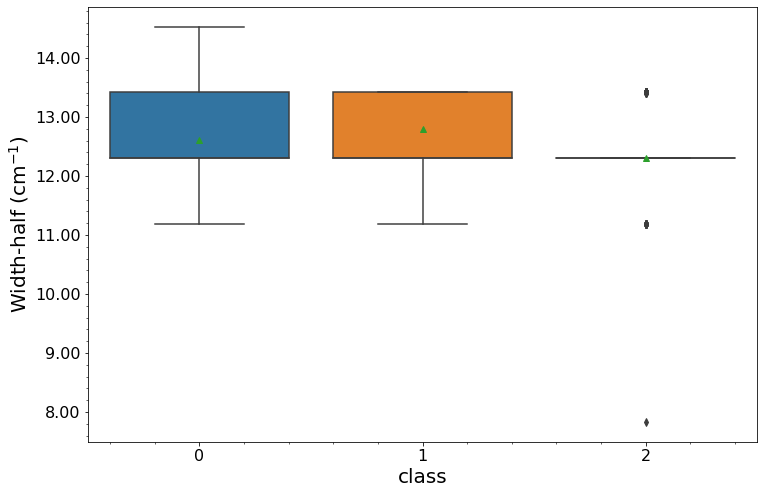

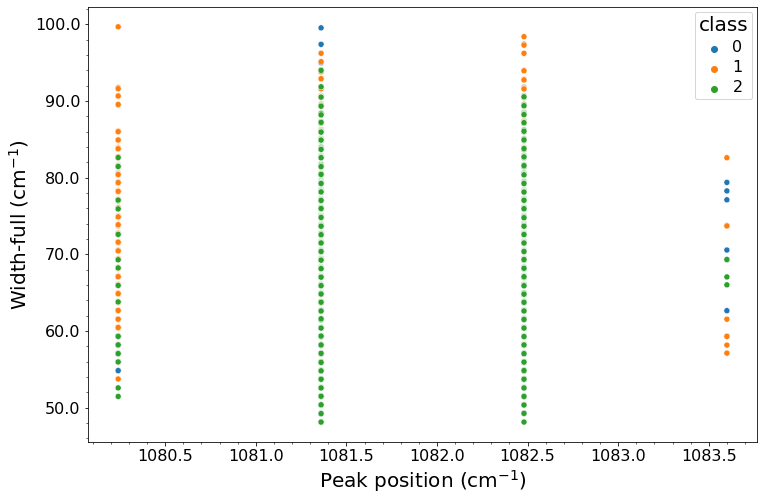

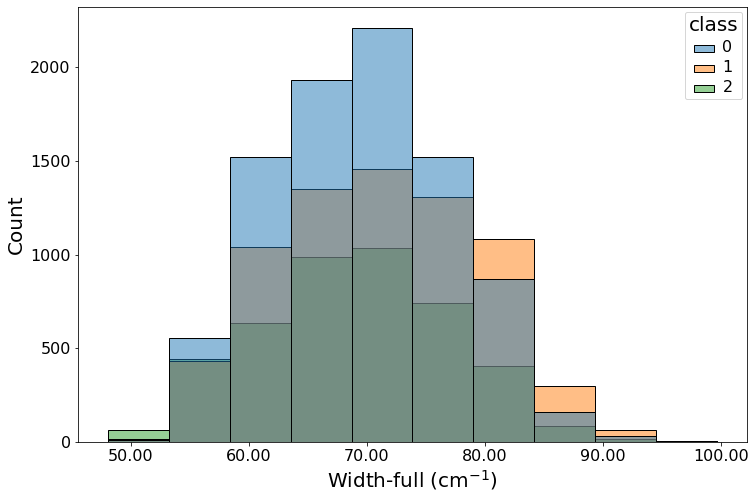

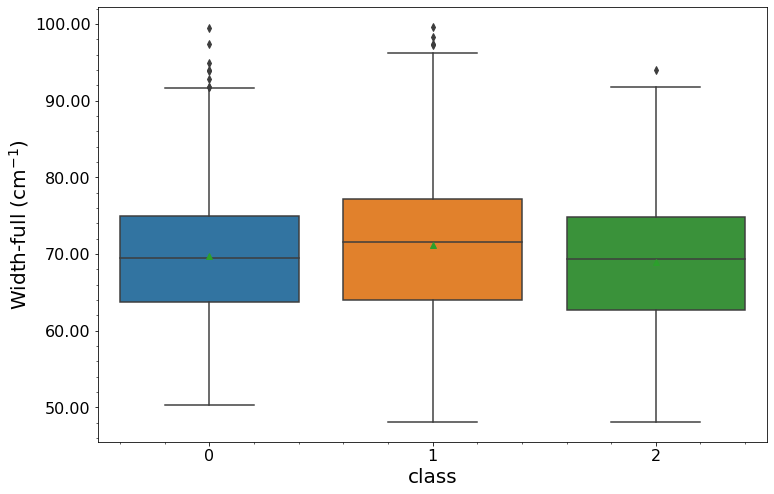

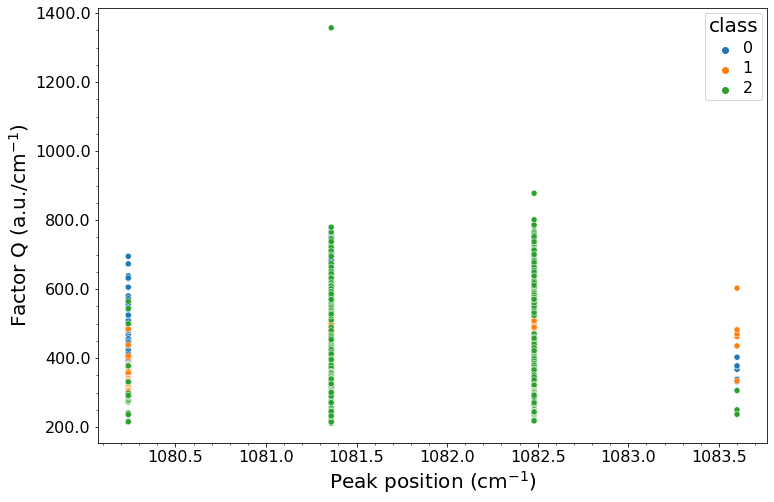

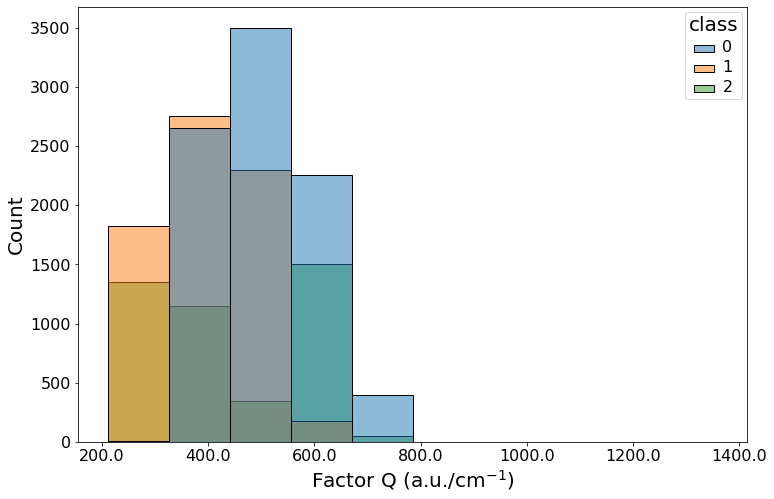

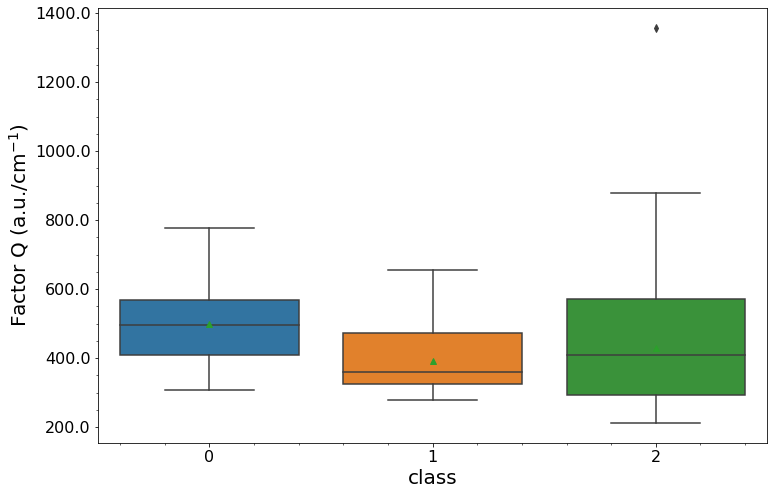

In [46]:


# Analysis - bands
# ---

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
for class_i in classes:
    peaks.loc[peaks['class'] == class_i]['band'].plot(label=str(class_i), marker='o', ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Curve', fontsize=fs_axeslabels)
axes.set_ylabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()
axes.legend(title='Class', fontsize=fs_legend, title_fontsize=fs_legend_title)
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(x='band', hue='class', bins=10, palette='tab10', data=peaks, legend=True, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
# axes.legend(title='Class', bbox_to_anchor=(1.0, 1.0), fontsize=fs_legend, title_fontsize=fs_legend_title)
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
# max_loc.boxplot(column='max_loc', by='class', ax=axs)
sns.boxplot(x='class', y='band', showmeans=True, data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_ylabel('Peak position ' +  '(cm$^{-1}$)')
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
axes.minorticks_on()
plt.show()

# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
# # max_loc.boxplot(column='max_loc', by='class', ax=axs)
# sns.boxplot(x='class', y='band', showmeans=True, data=peaks, ax=axs)
# axs.set_ylabel('Band of peak (cm-1)')
# # axs.minorticks_on()
# plt.show()

# Analysis - prominences
# ---

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.scatterplot(x='band', y='prominence', hue='class', palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Prominence (a.u.)', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(x='prominence', hue='class', bins=10, palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Prominence (a.u)', fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(x='class', y='prominence', showmeans=True, data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel('Prominence (a.u)', fontsize=fs_axeslabels)
axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.minorticks_on()
plt.show()


# Analysis - Widths-half
# ---

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.scatterplot(x='band', y='width_half', hue='class', palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Width-half ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.minorticks_on()
# axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(x='width_half', hue='class', bins=10, palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Width-half ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
# axs.minorticks_on()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(x='class', y='width_half', showmeans=True, data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel('Width-half ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes.minorticks_on()
plt.show()

# Analysis - Widths-full
# ---

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.scatterplot(x='band', y='width_full', hue='class', palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Width-full ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.minorticks_on()
# axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(x='width_full', hue='class', bins=10, palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Width-full ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(x='class', y='width_full', showmeans=True, data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel('Width-full ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes.minorticks_on()
plt.show()

# Analysis - q_factor
# ---

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.scatterplot(x='band', y='q_factor', hue='class', palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Peak position ' +  '(cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Factor Q (a.u./cm$^{-1}$)', fontsize=fs_axeslabels)
axes.minorticks_on()
axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(x='q_factor', hue='class', bins=10, palette='tab10', data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Factor Q (a.u./cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel(axes.get_ylabel(), fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.setp(axes.get_legend().get_texts(), fontsize=fs_legend)
plt.setp(axes.get_legend().get_title(), fontsize=fs_legend_title)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(x='class', y='q_factor', showmeans=True, data=peaks, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel(axes.get_xlabel(), fontsize=fs_axeslabels)
axes.set_ylabel('Factor Q (a.u./cm$^{-1}$)', fontsize=fs_axeslabels)
axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.minorticks_on()
plt.show()




K-S Test for the peak features

In [47]:
# k-s test
# https://towardsdatascience.com/when-to-use-the-kolmogorov-smirnov-test-dd0b2c8a8f61

# if p_value < 0.05 (5.000E-2) then H0 can be rejected and distributions are differents
# ks score: max is 1.0 (100 %)

ks_list = []

for pf in peaks.columns[:-1]:
    
    pf0 = peaks.loc[peaks['class'] == 0][pf]
    pf1 = peaks.loc[peaks['class'] == 1][pf]
    ks_value, p_value = stats.ks_2samp(pf0, pf1)
    ks_list.append([pf, ks_value, p_value])

ks_df = pd.DataFrame(ks_list, columns=['peak', 'ks_score', 'p_value'])

# pandas display
pd.options.display.float_format = "{:,.3E}".format
print(ks_df.sort_values(by=['p_value']))

pd.options.display.float_format = "{:,.3f}".format

         peak  ks_score   p_value
4  width_full 1.004E-01 3.553E-15
3  width_half 1.889E-01 2.550E-11
1        band 4.840E-02 2.032E-08
0         loc 1.000E+00 1.000E+00
2  prominence 4.845E-01 1.000E+00
5    q_factor 4.593E-01 1.000E+00
